<a href="https://colab.research.google.com/github/MariamMohamed20/Student_Performance_Analysis/blob/main/Student_Performance_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





#Import Liberaries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif


#Loading the Dataset
Load the student dataset and display the first few rows to understand the structure of the data.

In [ ]:
data = pd.read_csv('/Data analysis progect dataset.csv')
df=pd.DataFrame(data)
df.head()

,Student_ID,Student_Name,Gender,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes,Online_Classes_Taken,ParentalSupport
0,822,Sara Saeed,Female,7.0,99,Yes,9.0,1,91.0,excellent,False,Medium
1,823,Youssef Ibrahim,Male,4.0,82,No,4.0,2,65.0,review,True,High
2,824,Tarek Mahmoud,Male,8.0,51,Yes,7.0,2,45.0,review,True,Medium
3,825,Hassan Fouad,Male,5.0,52,Yes,5.0,2,36.0,excellent,True,Medium
4,826,Adel Ali,Male,7.0,75,No,8.0,5,66.0,review,NaN,Medium


#Describing the Dataset
Full statistical summary of both numerical and categorical features to understand distributions and potential issues.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,10005.0,NaN,NaN,NaN,5824.0,2888.339056,822.0,3323.0,5824.0,8325.0,10826.0
Student_Name,9805,420,Mahmoud Haddad,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9805,2,Female,4935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hours Studied,8973.0,NaN,NaN,NaN,4.997325,2.590449,1.0,3.0,5.0,7.0,9.0
Previous Scores,10005.0,NaN,NaN,NaN,69.437581,17.343872,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10005,2,No,5054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Hours,9509.0,NaN,NaN,NaN,6.529078,1.696752,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10005.0,NaN,NaN,NaN,4.590205,2.892721,0.0,2.0,5.0,7.0,27.0
Performance Index,10005.0,NaN,NaN,NaN,55.215792,19.213705,10.0,40.0,55.0,71.0,100.0
Notes,10005,2,excellent,5025,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Checking Data Types
displays the current data types of all columns to identify which features need convert

In [ ]:
df.dtypes

,0
Student_ID,int64
Student_Name,object
Gender,object
Hours Studied,float64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,float64
Sample Question Papers Practiced,int64
Performance Index,float64
Notes,object


#Checking Data Types
Convert selected columns into the category data type to prepare them for encoding and cleaning, except Student_Name because it contains many unique variations.

In [ ]:
categorical_columns = ["Gender","Extracurricular Activities","Notes","Online_Classes_Taken","ParentalSupport"]

for col in categorical_columns:
    df[col] = df[col].astype('category')

df['Student_ID'] = df['Student_ID'].astype('object')
df.dtypes


,0
Student_ID,object
Student_Name,object
Gender,category
Hours Studied,float64
Previous Scores,int64
Extracurricular Activities,category
Sleep Hours,float64
Sample Question Papers Practiced,int64
Performance Index,float64
Notes,category


#Checking Missing Values
Calculate the number of missing values in each column

In [ ]:
df.isna().sum()

,0
Student_ID,0
Student_Name,200
Gender,200
Hours Studied,1032
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,496
Sample Question Papers Practiced,0
Performance Index,0
Notes,0


#Checking Missing Values presentage
Compute the percentage of missing values in the dataset to understand which features require imputation.

In [ ]:
df.isna().sum()/100

,0
Student_ID,0.00
Student_Name,2.00
Gender,2.00
Hours Studied,10.32
Previous Scores,0.00
Extracurricular Activities,0.00
Sleep Hours,4.96
Sample Question Papers Practiced,0.00
Performance Index,0.00
Notes,0.00


#Handling Missing Values
This section fills missing values using suitable strategies:

Mode for categorical columns

Median for numerical columns

Assigning a new category “Unknown” for missing student names



In [ ]:
df['Student_Name'] = df['Student_Name'].astype('category')
df['Student_Name'] = df['Student_Name'].cat.add_categories('Unknown')
df['Student_Name'] = df['Student_Name'].fillna('Unknown')

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['ParentalSupport'] = df['ParentalSupport'].fillna(df['ParentalSupport'].mode()[0])

df['Sleep Hours'] = df['Sleep Hours'].fillna(df['Sleep Hours'].median())

df['Online_Classes_Taken'] = df['Online_Classes_Taken'].fillna(df['Online_Classes_Taken'].mode()[0])

df['Hours Studied'] = df['Hours Studied'].fillna(df['Hours Studied'].median())

#Checking Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

#Displaying Unique Values of Categorical Columns

We print the unique categories in each categorical column to verify consistency and detect anomalies.

In [ ]:
categorical_cols = ["ParentalSupport","Online_Classes_Taken","Notes","Extracurricular Activities","Gender"]
for col in categorical_cols:
    print(f"Unique values for {col}: {df[col].unique()}")

Unique values for ParentalSupport: ['Medium', 'High', 'Low']
Categories (3, object): ['High', 'Low', 'Medium']
Unique values for Online_Classes_Taken: [False, True]
Categories (2, bool): [False, True]
Unique values for Notes: ['excellent', 'review']
Categories (2, object): ['excellent', 'review']
Unique values for Extracurricular Activities: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Unique values for Gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


#Detecting Outliers using the IQR Method

This section identifies outliers for each numerical column using the Interquartile Range (IQR) technique.

In [ ]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")



Column: Hours Studied
Number of outliers: 0
Column: Previous Scores
Number of outliers: 0
Column: Sleep Hours
Number of outliers: 0
Column: Sample Question Papers Practiced
Number of outliers: 3
Column: Performance Index
Number of outliers: 0


# Outlier Handling for One Column (Z-score Method)

Here we:

Convert the column to numeric

Calculate z-scores

Remove extreme outliers

Visualize the result with a boxplot

In [ ]:
col = "Sample Question Papers Practiced"
df[col] = pd.to_numeric(df[col], errors='coerce')

z_scores = np.abs(stats.zscore(df[col].dropna()))

df = df.loc[z_scores <= 3]

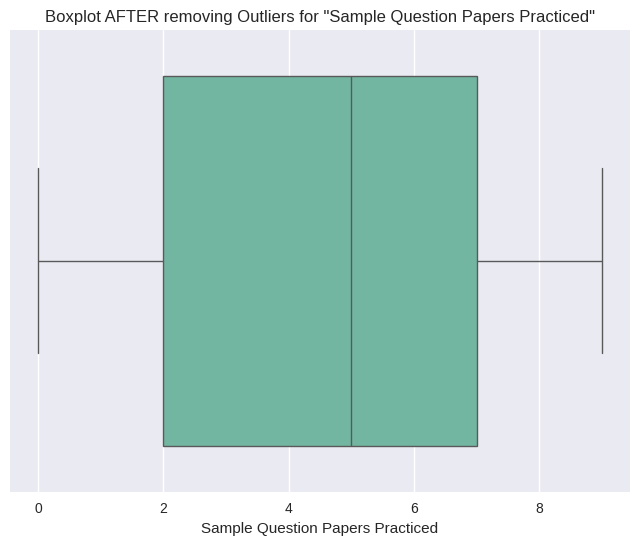

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df[col])
plt.title(f'Boxplot AFTER removing Outliers for "{col}"')
plt.xlabel(col)
plt.show()

# Capping Extreme Values
We clip unrealistic values (e.g., Sleep Hours > 24, Scores > 100) to keep the data valid.

In [ ]:
df['Hours Studied'] = df['Hours Studied'].clip(0, 24)
df['Sleep Hours'] = df['Sleep Hours'].clip(0, 24)
df['Previous Scores'] = df['Previous Scores'].clip(0, 100)
df['Performance Index'] = df['Performance Index'].clip(0, 100)

# Visualizing Numerical Feature Distributions

We generate histograms for all numerical columns to understand their distribution and detect skewness.

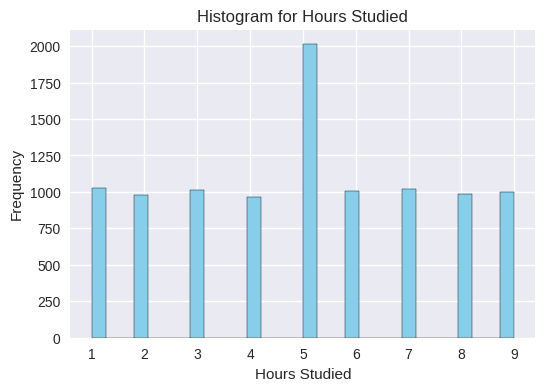

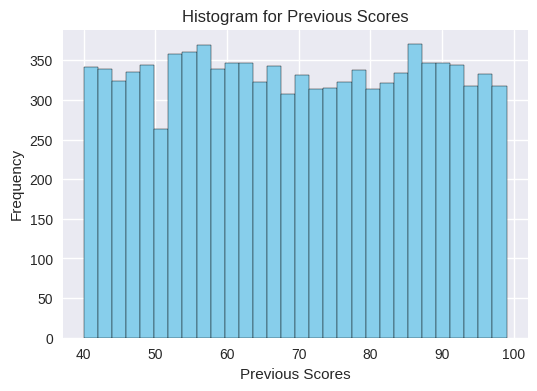

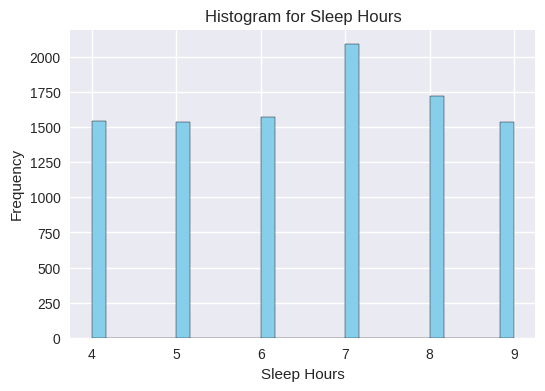

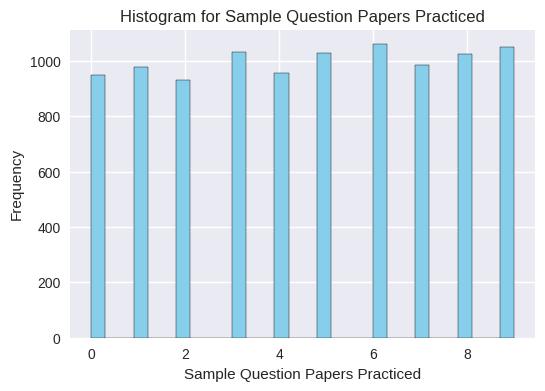

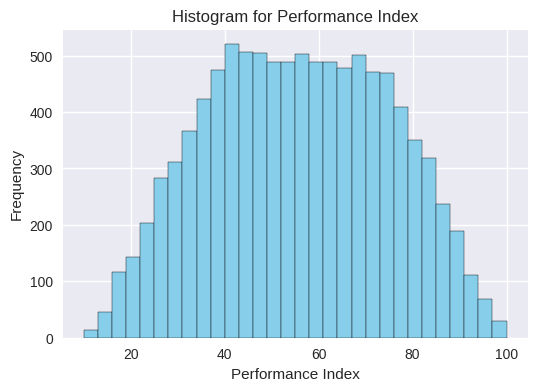

In [ ]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


#Computing Skewness

This cell calculates skewness for each numerical column to check the need for transformation.

In [ ]:
skew_values = df[num_cols].skew()
print(skew_values)

Hours Studied                      -0.005242
Previous Scores                     0.004918
Sleep Hours                        -0.081389
Sample Question Papers Practiced   -0.036057
Performance Index                  -0.001525
dtype: float64


# Skewness Summary:

After calculating skewness for all numerical features, the results show values very close to **zero** (between -0.1 and 0.1). This indicates that the numerical data is **approximately normally distributed**, with **no significant skew** present in any feature.

This means:
- No transformation (log, sqrt, boxcox) is required.
- Data distribution is balanced and suitable for modeling.
- No distortion caused by extreme skewness.

Overall, the dataset shows **no skew** in its numerical variables.


# Cleaned Dataset Saved & Downloaded:

After completing all data cleaning steps (handling missing values, checking skewness, and validating data quality), the cleaned dataset was successfully saved and downloaded to the local machine.

This ensures:
- The final dataset is clean, consistent, and ready for further analysis or modeling.
- No missing values remain.
- All numeric features are properly shaped and distribution-checked.
- The saved version represents the final cleaned state of the data.

The dataset is now ready to be used for Machine Learning, EDA visualization, or reporting.


In [ ]:
from google.colab import files

df.to_csv('students_cleaned.csv', index=False)
files.download('students_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Correlation Heatmap

We compute the correlation matrix for numerical features and visualize it using a heatmap to understand relationships between variables.

In [ ]:
TARGET = 'Performance Index'

EXCLUDE_COLS = ['Student_ID', 'Notes']

def print_top_correlations(df, target=TARGET, method='pearson', top_n=15):
    num_df = df.select_dtypes(include=['number']).copy()
    num_df = num_df.drop(columns=[col for col in EXCLUDE_COLS if col in num_df.columns])  # remove unwanted cols

    if target not in num_df.columns:
        print(f"Target '{target}' not numeric or not found in numeric columns.")
        return

    corrs = num_df.corr(method=method)[target].drop(index=target).sort_values(
        key=lambda x: x.abs(), ascending=False
    )

    print(f"Top {top_n} correlations with '{target}' (method={method}):")
    display(corrs.head(top_n))


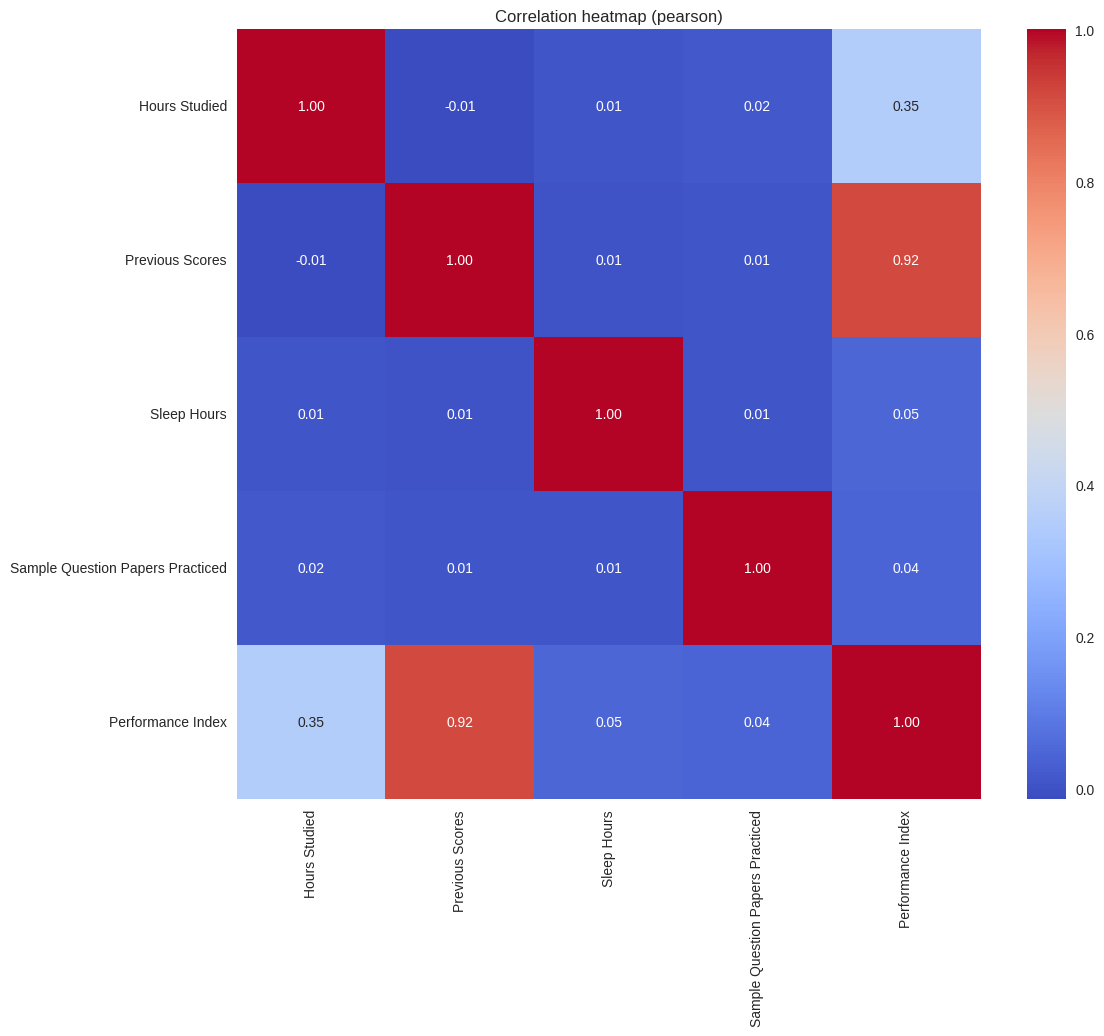

In [ ]:
def plot_heatmap(df, annot=True, figsize=(12,10), method='pearson'):
    num_df = df.select_dtypes(include=['number']).copy()
    num_df = num_df.drop(columns=[col for col in EXCLUDE_COLS if col in num_df.columns])

    plt.figure(figsize=figsize)
    sns.heatmap(num_df.corr(method=method), annot=annot, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation heatmap ({method})")
    plt.show()
plot_heatmap(df, method='pearson')

#📌 Exploratory Data Analysis (EDA)

##In this section, we explore the student performance dataset using both univariate and multivariate analyses.
**Our goal is to understand:**


1) How each variable behaves individually

2) How features relate to each other

3) Which factors may influence the Performance Index

4) Insights to guide later modeling & statistical tests

We use visualizations (histograms, boxplots, countplots, heatmaps, pairplots) to interpret patterns clearly.

###📌 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


### **📌 SECTION 1: UNIVARIATE ANALYSIS - NUMERICAL FEATURES**




##### ***1.1 Distribution Analysis of Key Performance Metrics***

**Distribution Analysis of Key Performance Metric:**

We'll analyze the distribution of our target variable (Performance Index)
and other important numerical features to understand central tendencies,
spread, and potential patterns.

**Insights:**
- The distribution shape indicates whether most students perform at similar levels
- Skewness shows if performance is biased towards high or low achievers
- The boxplot reveals outliers (exceptional or struggling students)


######**Insight:**
Understand the overall distribution of student performance, identify high/low performers, and detect outliers.

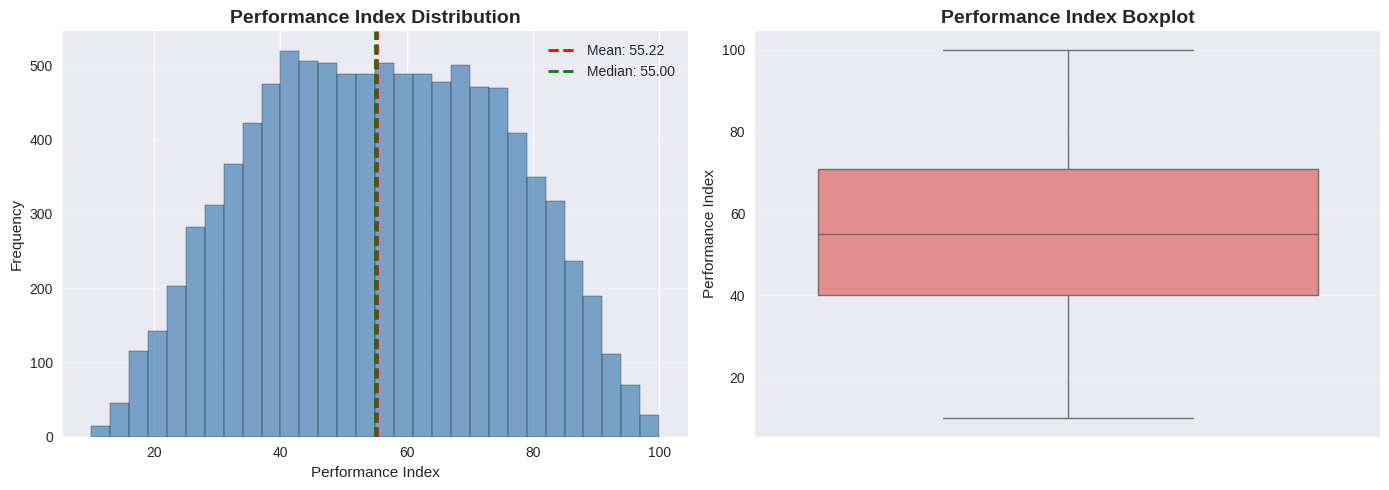

PERFORMANCE INDEX STATISTICS
count    10002.000000
mean        55.219956
std         19.213643
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64

Skewness: -0.002


In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Performance Index'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Performance Index'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Performance Index'].mean():.2f}")
plt.axvline(df['Performance Index'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['Performance Index'].median():.2f}")
plt.title('Performance Index Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Performance Index'], color='lightcoral')
plt.title('Performance Index Boxplot', fontsize=14, fontweight='bold')
plt.ylabel('Performance Index')
plt.grid(axis='y', alpha=0.3)



plt.tight_layout()
plt.show()
print("=" * 70)
print("PERFORMANCE INDEX STATISTICS")
print("=" * 70)
print(df['Performance Index'].describe())
print(f"\nSkewness: {df['Performance Index'].skew():.3f}")
print("=" * 70)

##### **1.2 Study Habits Analysis - Hours Studied**

Study time indicates student dedication and potential impact on learning outcomes.

**Insight:** Most students study 2-6 hours. Students studying <2h may underperform, while >6h shows high dedication.







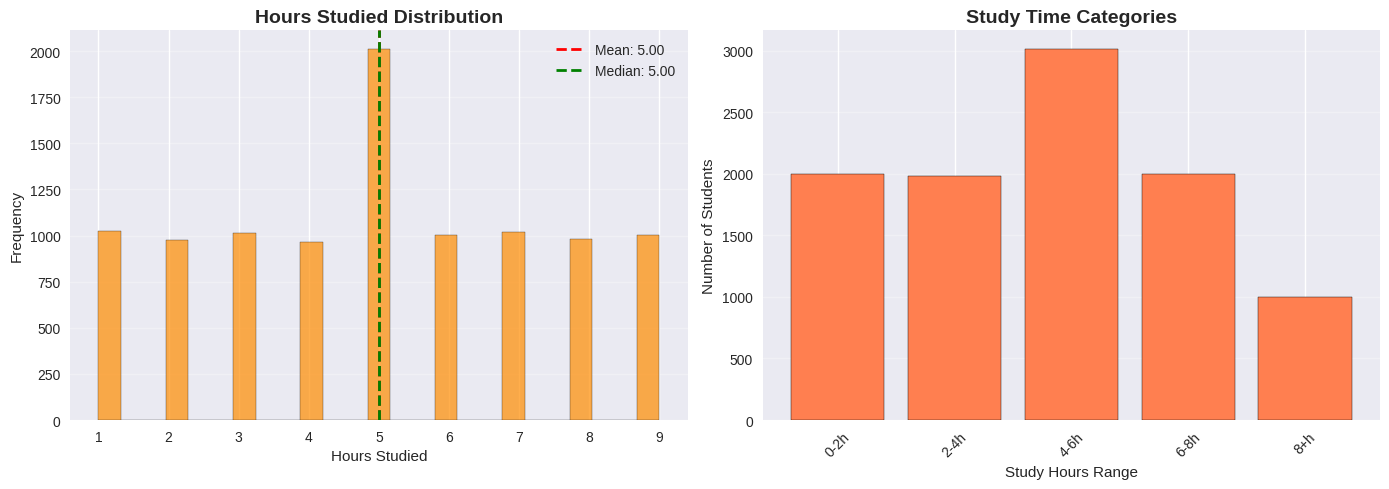


HOURS STUDIED STATISTICS
count    10002.000000
mean         4.997500
std          2.453058
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64

Students studying <2 hours: 1025 (10.2%)
Students studying >6 hours: 3004 (30.0%)


In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Hours Studied'], bins=25, color='darkorange', edgecolor='black', alpha=0.7)
plt.axvline(df['Hours Studied'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Hours Studied'].mean():.2f}")
plt.axvline(df['Hours Studied'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['Hours Studied'].median():.2f}")
plt.title('Hours Studied Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
# Create study time categories
study_bins = [0, 2, 4, 6, 8, 24]
study_labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8+h']
df['Study_Category'] = pd.cut(df['Hours Studied'], bins=study_bins, labels=study_labels, include_lowest=True)
study_counts = df['Study_Category'].value_counts().sort_index()
plt.bar(study_counts.index, study_counts.values, color='coral', edgecolor='black')
plt.title('Study Time Categories', fontsize=14, fontweight='bold')
plt.xlabel('Study Hours Range')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("HOURS STUDIED STATISTICS")
print("=" * 70)
print(df['Hours Studied'].describe())
print(f"\nStudents studying <2 hours: {(df['Hours Studied'] < 2).sum()} ({(df['Hours Studied'] < 2).sum()/len(df)*100:.1f}%)")
print(f"Students studying >6 hours: {(df['Hours Studied'] > 6).sum()} ({(df['Hours Studied'] > 6).sum()/len(df)*100:.1f}%)")
print("=" * 70)

##### **1.3 Sleep Patterns Analysis**

Sleep is crucial for cognitive function and academic performance.

**Insight:** Adequate sleep (7-9h) is crucial for performance. Identify sleep-deprived students (<6h) who may need intervention.

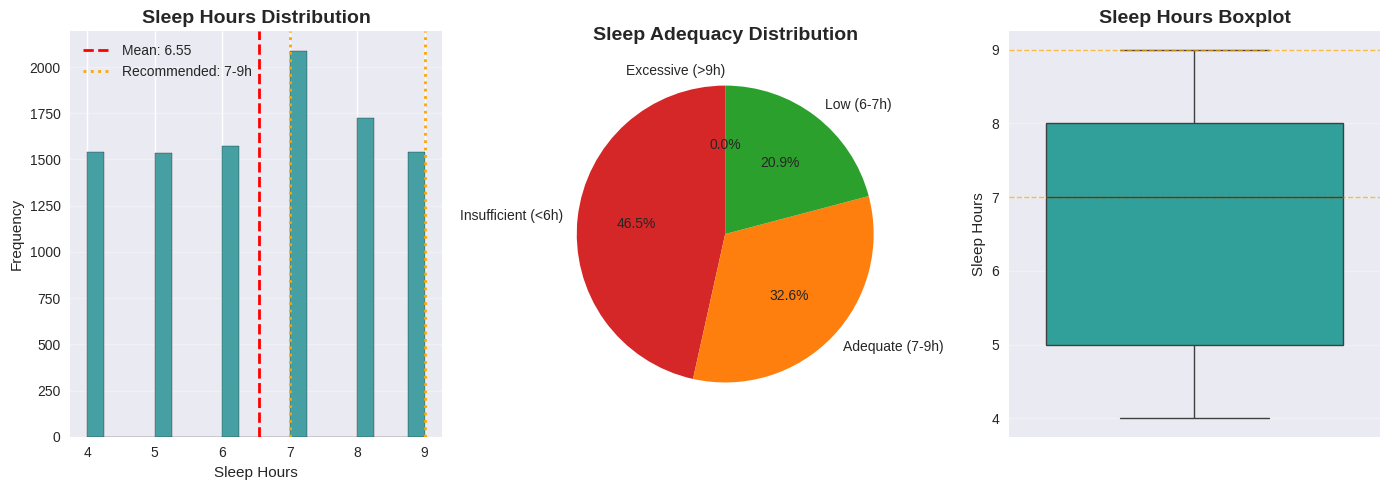


SLEEP HOURS STATISTICS
count    10002.000000
mean         6.552390
std          1.657477
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64

Students with adequate sleep (7-9h): 5349 (53.5%)
Students sleep deprived (<6h): 3079 (30.8%)


In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Sleep Hours'], bins=20, color='teal', edgecolor='black', alpha=0.7)
plt.axvline(df['Sleep Hours'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Sleep Hours'].mean():.2f}")
plt.axvline(7, color='orange', linestyle=':', linewidth=2, label="Recommended: 7-9h")
plt.axvline(9, color='orange', linestyle=':', linewidth=2)
plt.title('Sleep Hours Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 2)
# Sleep adequacy categories
sleep_adequacy = pd.cut(df['Sleep Hours'], bins=[0, 6, 7, 9, 24], labels=['Insufficient (<6h)', 'Low (6-7h)', 'Adequate (7-9h)', 'Excessive (>9h)'])
sleep_counts = sleep_adequacy.value_counts()
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']
plt.pie(sleep_counts.values, labels=sleep_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sleep Adequacy Distribution', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Sleep Hours'], color='lightseagreen')
plt.title('Sleep Hours Boxplot', fontsize=14, fontweight='bold')
plt.ylabel('Sleep Hours')
plt.axhline(7, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='Recommended Range')
plt.axhline(9, color='orange', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SLEEP HOURS STATISTICS")
print("=" * 70)
print(df['Sleep Hours'].describe())
print(f"\nStudents with adequate sleep (7-9h): {((df['Sleep Hours'] >= 7) & (df['Sleep Hours'] <= 9)).sum()} ({((df['Sleep Hours'] >= 7) & (df['Sleep Hours'] <= 9)).sum()/len(df)*100:.1f}%)")
print(f"Students sleep deprived (<6h): {(df['Sleep Hours'] < 6).sum()} ({(df['Sleep Hours'] < 6).sum()/len(df)*100:.1f}%)")
print("=" * 70)

#####  **1.4 Previous Performance Analysis**

Previous scores reflect academic history and help predict future performance.

**Insight:** Past performance strongly predicts current performance. Shows baseline academic level and identifies struggling students.

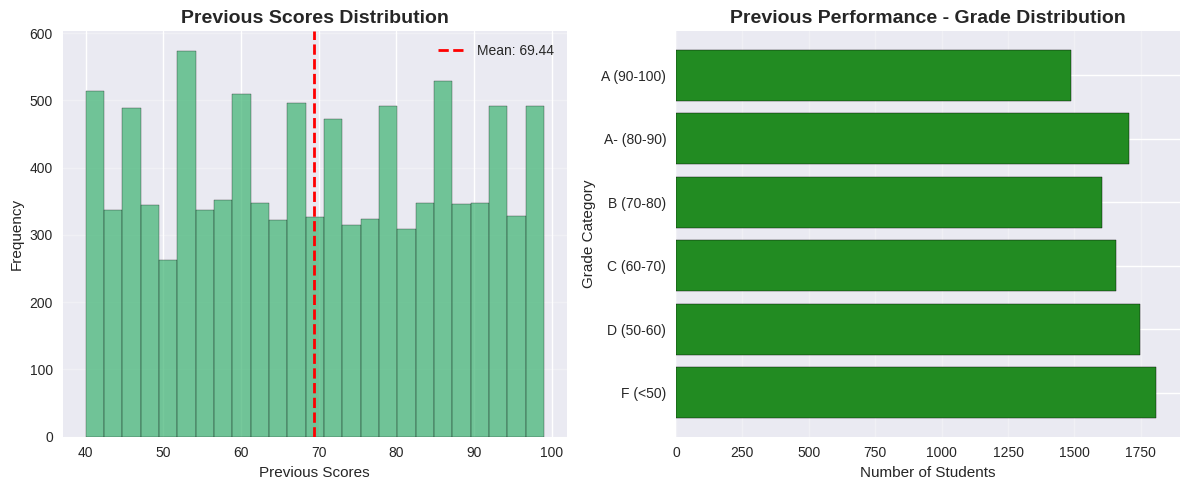


PREVIOUS SCORES STATISTICS
count    10002.000000
mean        69.441112
std         17.343474
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Previous Scores'], bins=25, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.axvline(df['Previous Scores'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Previous Scores'].mean():.2f}")
plt.title('Previous Scores Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Previous Scores')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
# Grade categories
grade_bins = [0, 50, 60, 70, 80, 90, 100]
grade_labels = ['F (<50)', 'D (50-60)', 'C (60-70)', 'B (70-80)', 'A- (80-90)', 'A (90-100)']
df['Previous_Grade'] = pd.cut(df['Previous Scores'], bins=grade_bins, labels=grade_labels, include_lowest=True)
grade_counts = df['Previous_Grade'].value_counts().sort_index()
plt.barh(grade_counts.index, grade_counts.values, color='forestgreen', edgecolor='black')
plt.title('Previous Performance - Grade Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Grade Category')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("PREVIOUS SCORES STATISTICS")
print("=" * 70)
print(df['Previous Scores'].describe())
print("=" * 70)

#####  **1.5 Sample Question Papers Practice Analysis**

Practicing sample papers improves exam readiness and familiarity with question formats.

**Insight:** Practicing 5+ papers improves exam readiness. Shows which students actively prepare and who may need encouragement.



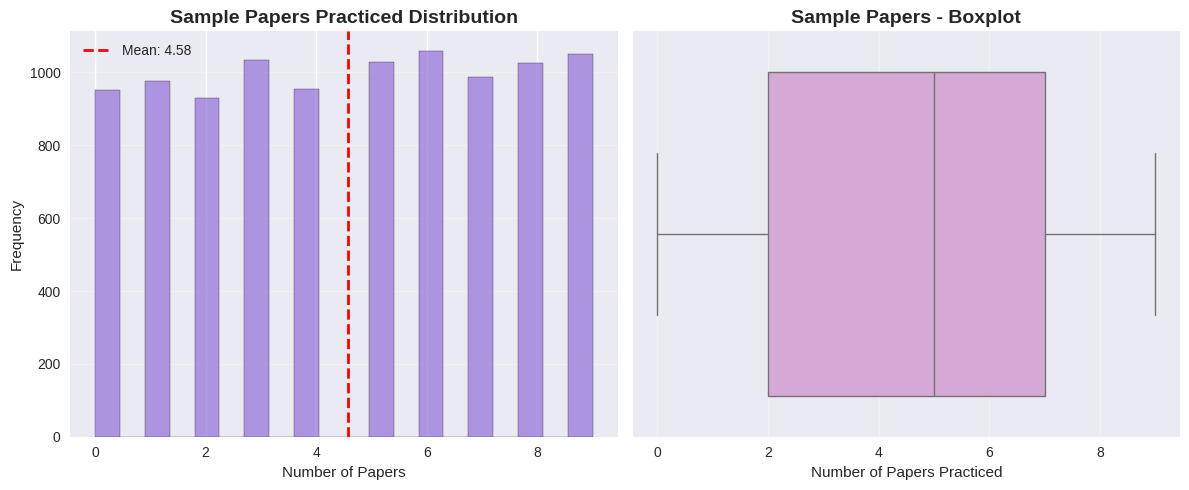


SAMPLE PAPERS PRACTICED STATISTICS
count    10002.000000
mean         4.583483
std          2.866994
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64

Students practicing ≥5 papers: 5154 (51.5%)


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Sample Question Papers Practiced'], bins=20, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.axvline(df['Sample Question Papers Practiced'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['Sample Question Papers Practiced'].mean():.2f}")
plt.title('Sample Papers Practiced Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Papers')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sample Question Papers Practiced'], color='plum')
plt.title('Sample Papers - Boxplot', fontsize=14, fontweight='bold')
plt.xlabel('Number of Papers Practiced')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SAMPLE PAPERS PRACTICED STATISTICS")
print("=" * 70)
print(df['Sample Question Papers Practiced'].describe())
print(f"\nStudents practicing ≥5 papers: {(df['Sample Question Papers Practiced'] >= 5).sum()} ({(df['Sample Question Papers Practiced'] >= 5).sum()/len(df)*100:.1f}%)")
print("=" * 70)


### **📌SECTION 2:  UNIVARIATE ANALYSIS - CATEGORICAL FEATURES**



#####  **2.1 Gender Distribution**

Gender distribution shows the balance between male and female students, which can reveal demographic trends and potential performance differences.

**Insight:** Shows male-to-female ratio in the dataset. Helps identify if gender-specific support is needed.

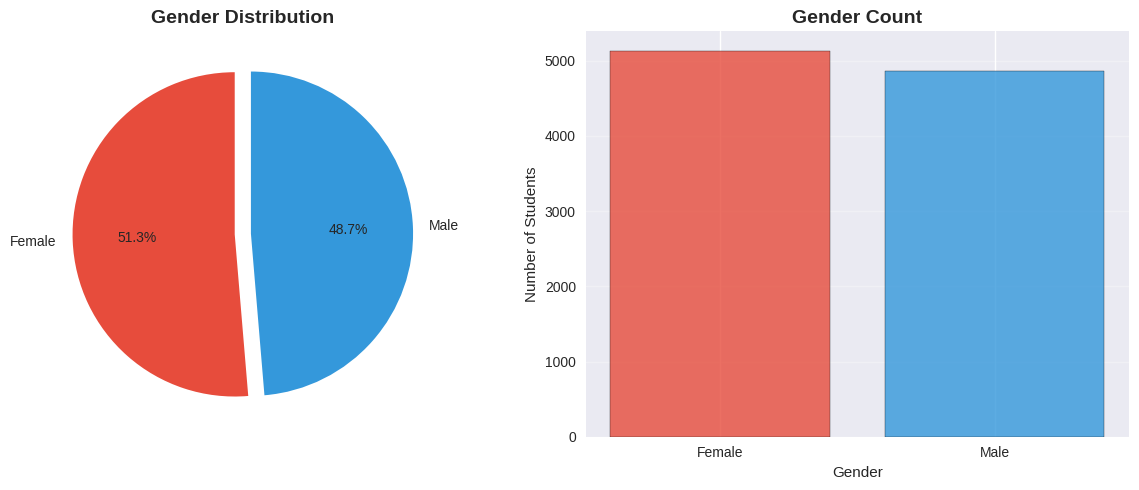


GENDER DISTRIBUTION
Gender
Female    5134
Male      4868
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
if 'Gender_Male' in df.columns and 'Gender_Female' in df.columns:
    gender_counts = pd.Series({
        'Male': df['Gender_Male'].sum(),
        'Female': df['Gender_Female'].sum()
    })
else:
    gender_counts = df['Gender'].value_counts()

colors_dict = {'Male': '#3498db', 'Female': '#e74c3c'}
colors = [colors_dict.get(label, '#cccccc') for label in gender_counts.index]
explode_values = [0.05] * len(gender_counts)  # Dynamic explode based on data length

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=explode_values)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
plt.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black', alpha=0.8)
plt.title('Gender Count', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("GENDER DISTRIBUTION")
print("=" * 70)
print(gender_counts)
print("=" * 70)

##### **2.2 Extracurricular Activities Participation**

Participation in extracurricular activities reflects student engagement outside academics and may influence overall performance and skills development.

**Insight:** Reveals how many students engage outside academics. Balanced participation develops soft skills without hurting grades.

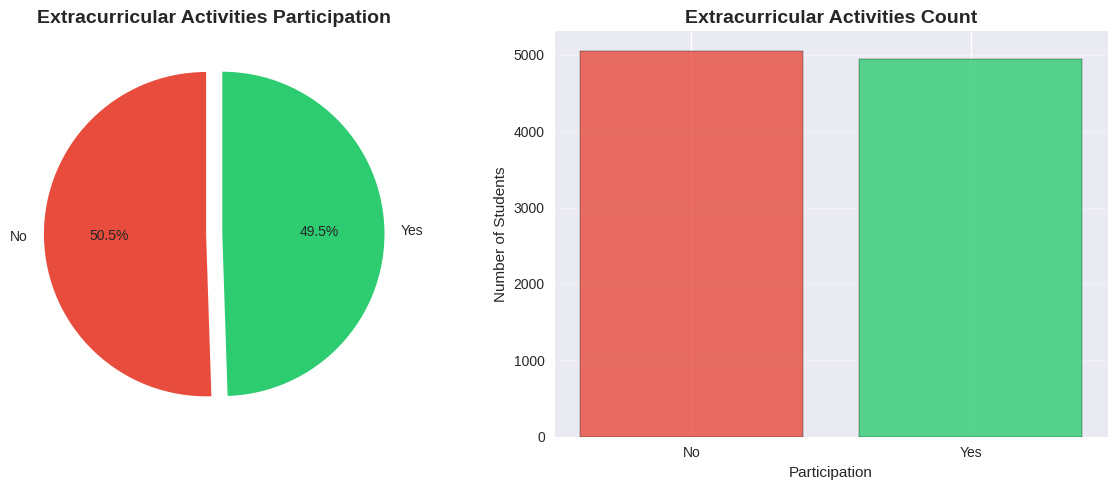


EXTRACURRICULAR ACTIVITIES
Extracurricular Activities
No     5053
Yes    4949
Name: count, dtype: int64

Participation Rate: 49.5%


In [ ]:
plt.figure(figsize=(12, 5))

# Safe mapping for 0/1 or Yes/No
activities_map = {0: 'No', 1: 'Yes', 'No': 'No', 'Yes': 'Yes'}
activities_counts = df['Extracurricular Activities'].map(activities_map).value_counts()

# Dynamic explode list
explode = [0.05] * len(activities_counts)

# Dynamic colors (repeat if needed)
base_colors = ['#e74c3c', '#2ecc71', '#3498db', '#9b59b6']
colors = base_colors[:len(activities_counts)]

# PIE CHART
plt.subplot(1, 2, 1)
plt.pie(
    activities_counts.values,
    labels=activities_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode
)
plt.title('Extracurricular Activities Participation', fontsize=14, fontweight='bold')

# BAR CHART
plt.subplot(1, 2, 2)
plt.bar(
    activities_counts.index,
    activities_counts.values,
    color=colors,
    edgecolor='black',
    alpha=0.8
)
plt.title('Extracurricular Activities Count', fontsize=14, fontweight='bold')
plt.xlabel('Participation')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("EXTRACURRICULAR ACTIVITIES")
print("=" * 70)
print(activities_counts)

# Avoid KeyError if 'Yes' doesn't exist
if 'Yes' in activities_counts.index:
    rate = activities_counts['Yes'] / activities_counts.sum() * 100
    print(f"\nParticipation Rate: {rate:.1f}%")
else:
    print("\nParticipation Rate: No 'Yes' category found")

print("=" * 70)


#####**2.3 Parental Support Levels**

Parental support influences student motivation, study habits, and academic success.

**Insight:** Students with high parental support typically perform better. Low support students may need extra mentoring.



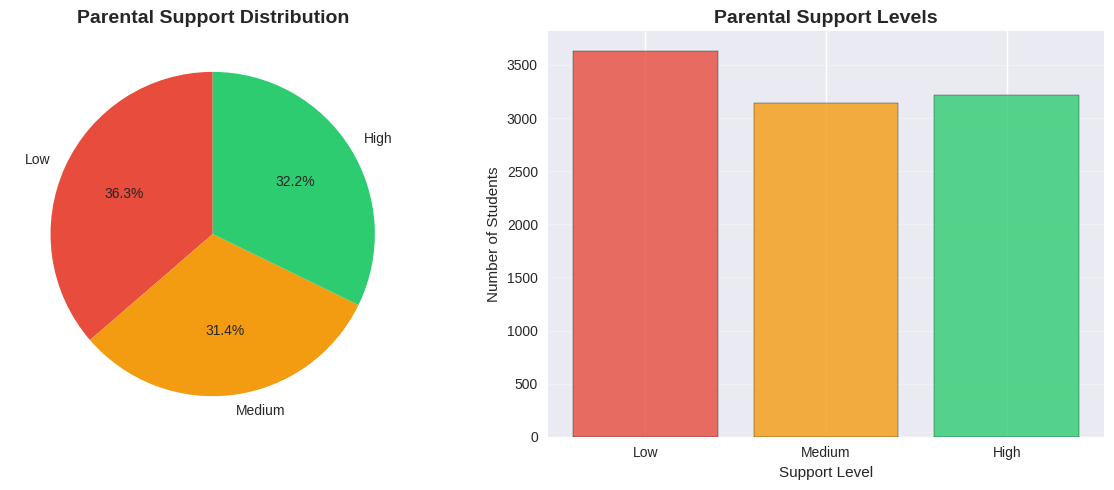


PARENTAL SUPPORT DISTRIBUTION
ParentalSupport
Low       3635
Medium    3145
High      3222
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 5))

# Smart mapping for either numeric or already-coded parental support
support_map = {0: 'Low', 1: 'Medium', 2: 'High',
               'Low': 'Low', 'Medium': 'Medium', 'High': 'High'}

support_series = df['ParentalSupport'].map(support_map)

support_counts = support_series.value_counts()

# Sort by correct order
support_order = ['Low', 'Medium', 'High']
support_counts = support_counts.reindex([x for x in support_order if x in support_counts.index])

# Colors for each level
colors_dict = {'Low': '#e74c3c', 'Medium': '#f39c12', 'High': '#2ecc71'}
colors = [colors_dict[x] for x in support_counts.index]

# PIE CHART
plt.subplot(1, 2, 1)
plt.pie(
    support_counts.values,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
plt.title('Parental Support Distribution', fontsize=14, fontweight='bold')

# BAR CHART
plt.subplot(1, 2, 2)
plt.bar(
    support_counts.index,
    support_counts.values,
    color=colors,
    edgecolor='black',
    alpha=0.8
)
plt.title('Parental Support Levels', fontsize=14, fontweight='bold')
plt.xlabel('Support Level')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# PRINT
print("\n" + "=" * 70)
print("PARENTAL SUPPORT DISTRIBUTION")
print("=" * 70)
print(support_counts)
print("=" * 70)


### **📌 SECTION 3:  BIVARIATE ANALYSIS - NUMERICAL vs TARGET**


##### **3.1 Study Hours vs Performance Index**

Analyzing the relationship between study time and academic performance.

**Insight:** Positive correlation—more study time generally leads to better performance. Optimal range appears to be 4-6 hours.


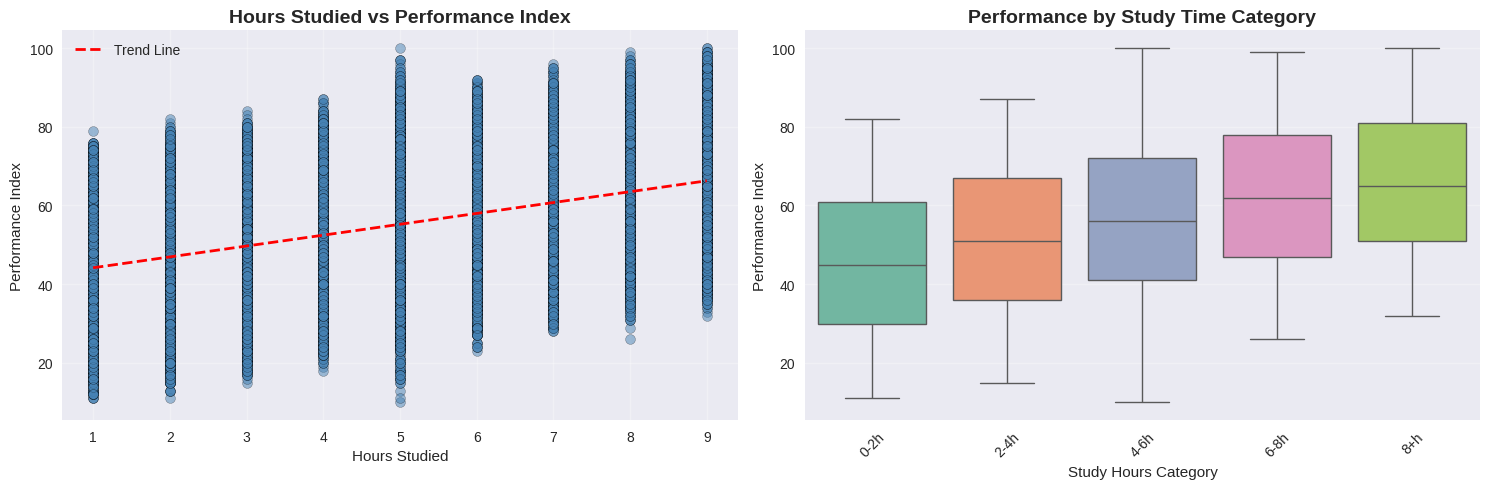


STUDY HOURS vs PERFORMANCE CORRELATION
Pearson Correlation: 0.353

Mean Performance by Study Category:
                     mean        std  count
Study_Category                             
0-2h            45.322516  17.907823   2003
2-4h            51.181910  17.872039   1979
4-6h            56.324602  18.341746   3016
6-8h            62.222278  17.933690   2002
8+h             65.664671  17.899133   1002


In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Hours Studied'], df['Performance Index'], alpha=0.5, c='steelblue', edgecolors='black', s=50)
plt.title('Hours Studied vs Performance Index', fontsize=14, fontweight='bold')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['Hours Studied'].dropna(), df['Performance Index'][df['Hours Studied'].notna()], 1)
p = np.poly1d(z)
plt.plot(df['Hours Studied'].sort_values(), p(df['Hours Studied'].sort_values()), "r--", linewidth=2, label='Trend Line')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='Study_Category', y='Performance Index', data=df, palette='Set2')
plt.title('Performance by Study Time Category', fontsize=14, fontweight='bold')
plt.xlabel('Study Hours Category')
plt.ylabel('Performance Index')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# Calculate correlation
corr_study_perf = df['Hours Studied'].corr(df['Performance Index'])
print("\n" + "=" * 70)
print("STUDY HOURS vs PERFORMANCE CORRELATION")
print("=" * 70)
print(f"Pearson Correlation: {corr_study_perf:.3f}")
print("\nMean Performance by Study Category:")
print(df.groupby('Study_Category')['Performance Index'].agg(['mean', 'std', 'count']))
print("=" * 70)



#####**3.2 Sleep Hours vs Performance Index**
Examining how sleep affects academic performance.

**Insight:** Adequate sleep (7-9h) improves performance. Both insufficient and excessive sleep may reduce effectiveness.

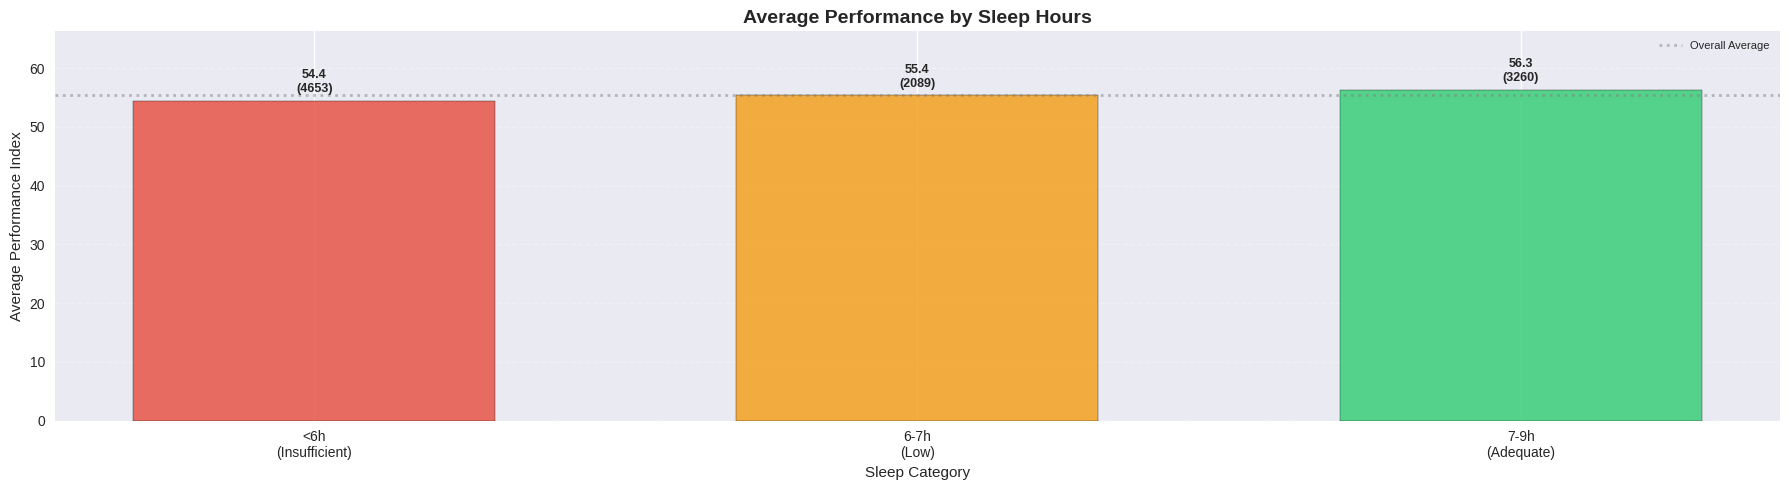


SLEEP HOURS vs PERFORMANCE - COMPREHENSIVE ANALYSIS
Pearson Correlation: 0.047

Best Performing Sleep Range: 7-9h
(Adequate)
Highest Average Score: 56.28
Lowest Average Score: 54.40
Performance Difference: 1.88 points

Performance by Sleep Category:
  <6h
(Insufficient): 54.40 (4653 students)
  6-7h
(Low): 55.38 (2089 students)
  7-9h
(Adequate): 56.28 (3260 students)


In [ ]:
plt.figure(figsize=(18, 5))

# ============== PLOT 1: Bar Chart with Averages ==============
plt.subplot(1, 1, 1)
sleep_categories_detailed = pd.cut(df['Sleep Hours'], bins=[0, 6, 7, 9, 24],
                          labels=['<6h\n(Insufficient)', '6-7h\n(Low)',
                                  '7-9h\n(Adequate)', '>9h\n(Excessive)'])

# Calculate average performance for each sleep category
sleep_perf = df.groupby(sleep_categories_detailed, observed=True)['Performance Index'].agg(['mean', 'count'])

# Create bar chart with colors showing sleep quality
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']  # Red, Orange, Green, Blue
bars = plt.bar(sleep_perf.index, sleep_perf['mean'],
               color=colors, edgecolor='black', alpha=0.8, width=0.6)

# Add value labels on top of bars
for bar, val, count in zip(bars, sleep_perf['mean'], sleep_perf['count']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1.5,
             f'{val:.1f}\n({int(count)})',
             ha='center', fontsize=9, fontweight='bold')

plt.title('Average Performance by Sleep Hours', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Category', fontsize=11)
plt.ylabel('Average Performance Index', fontsize=11)
plt.ylim(0, max(sleep_perf['mean']) + 10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add overall average line
plt.axhline(y=sleep_perf['mean'].mean(), color='gray', linestyle=':',
            linewidth=2, alpha=0.5, label='Overall Average')
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

# ============== Print Statistics ==============
corr_sleep_perf = df['Sleep Hours'].corr(df['Performance Index'])
print("\n" + "=" * 70)
print("SLEEP HOURS vs PERFORMANCE - COMPREHENSIVE ANALYSIS")
print("=" * 70)
print(f"Pearson Correlation: {corr_sleep_perf:.3f}")
print(f"\nBest Performing Sleep Range: {sleep_perf['mean'].idxmax()}")
print(f"Highest Average Score: {sleep_perf['mean'].max():.2f}")
print(f"Lowest Average Score: {sleep_perf['mean'].min():.2f}")
print(f"Performance Difference: {sleep_perf['mean'].max() - sleep_perf['mean'].min():.2f} points")
print("\nPerformance by Sleep Category:")
for idx, row in sleep_perf.iterrows():
    print(f"  {idx}: {row['mean']:.2f} ({int(row['count'])} students)")
print("=" * 70)

#####**3.3 Previous Scores vs Current Performance**
Previous academic performance is a strong predictor of current performance.

**Insight:** Strongest predictor! High correlation shows past performance is the best indicator of current success.




PREVIOUS SCORES vs PERFORMANCE CORRELATION
Pearson Correlation: 0.915

This is the STRONGEST predictor of current performance!


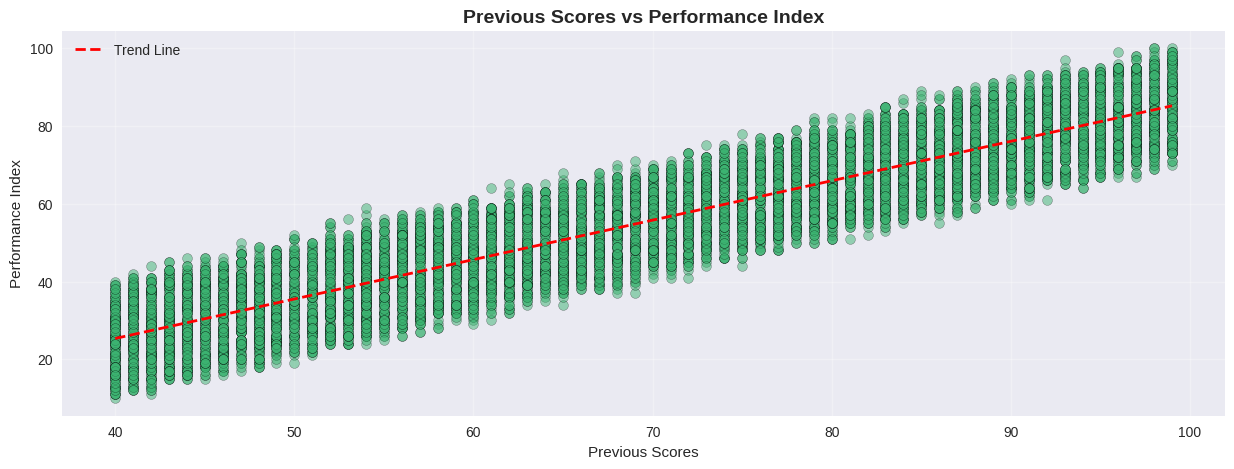

In [ ]:


plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
plt.scatter(df['Previous Scores'], df['Performance Index'], alpha=0.5, c='mediumseagreen', edgecolors='black', s=50)
plt.title('Previous Scores vs Performance Index', fontsize=14, fontweight='bold')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['Previous Scores'].dropna(), df['Performance Index'][df['Previous Scores'].notna()], 1)
p = np.poly1d(z)
plt.plot(df['Previous Scores'].sort_values(), p(df['Previous Scores'].sort_values()), "r--", linewidth=2, label='Trend Line')
plt.legend()


corr_prev_perf = df['Previous Scores'].corr(df['Performance Index'])
print("\n" + "=" * 70)
print("PREVIOUS SCORES vs PERFORMANCE CORRELATION")
print("=" * 70)
print(f"Pearson Correlation: {corr_prev_perf:.3f}")
print("\nThis is the STRONGEST predictor of current performance!")
print("=" * 70)


#####**3.4 Sample Papers Practiced vs Performance**

#####**Insight:** Practicing more papers correlates with better performance. Clear benefit from exam preparation.

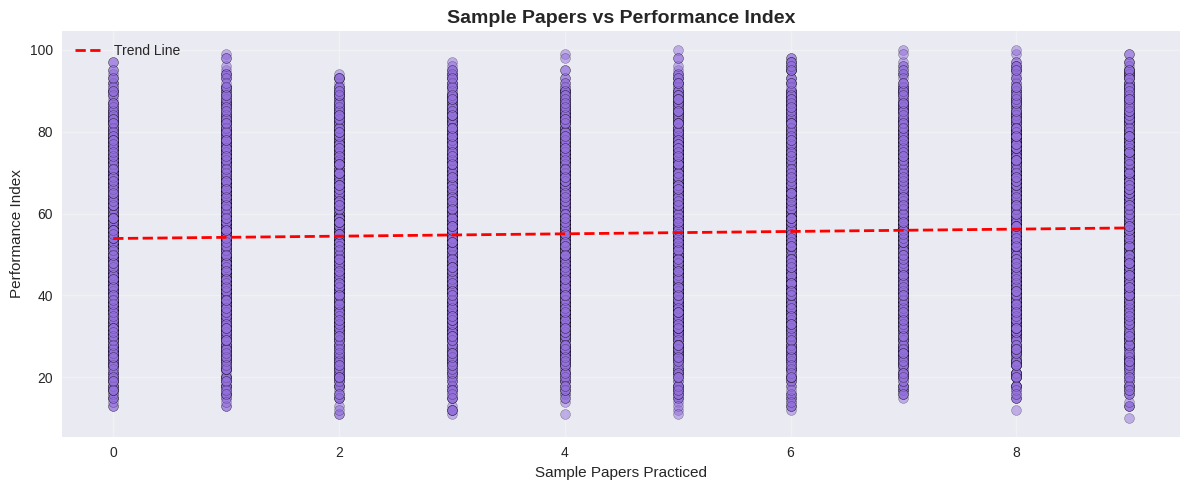


SAMPLE PAPERS vs PERFORMANCE CORRELATION
Pearson Correlation: 0.043


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
plt.scatter(df['Sample Question Papers Practiced'], df['Performance Index'], alpha=0.5, c='mediumpurple', edgecolors='black', s=50)
plt.title('Sample Papers vs Performance Index', fontsize=14, fontweight='bold')
plt.xlabel('Sample Papers Practiced')
plt.ylabel('Performance Index')
plt.grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['Sample Question Papers Practiced'].dropna(), df['Performance Index'][df['Sample Question Papers Practiced'].notna()], 1)
p = np.poly1d(z)
plt.plot(df['Sample Question Papers Practiced'].sort_values(), p(df['Sample Question Papers Practiced'].sort_values()), "r--", linewidth=2, label='Trend Line')
plt.legend()

plt.tight_layout()
plt.show()

corr_papers_perf = df['Sample Question Papers Practiced'].corr(df['Performance Index'])
print("\n" + "=" * 70)
print("SAMPLE PAPERS vs PERFORMANCE CORRELATION")
print("=" * 70)
print(f"Pearson Correlation: {corr_papers_perf:.3f}")
print("=" * 70)


###**📌 SECTION 4:   BIVARIATE ANALYSIS - CATEGORICAL vs TARGET**


#####**4.1 Gender vs Performance**

Gender differences may influence academic performance and highlight trends between male and female students.

**Insight:** Compare mean performance between males and females. Shows if gender gap exists in academic achievement.

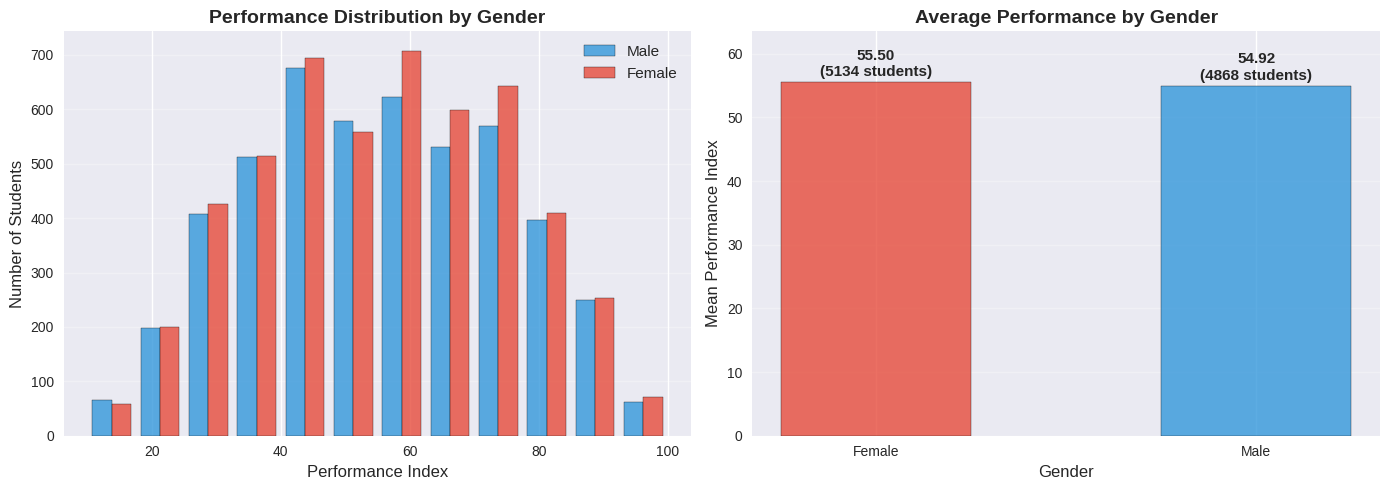


GENDER vs PERFORMANCE STATISTICS
         count       mean        std   min   25%   50%   75%    max
Gender                                                             
Female  5134.0  55.503701  19.128282  11.0  40.0  56.0  71.0  100.0
Male    4868.0  54.920707  19.300706  10.0  40.0  54.0  70.0  100.0

Performance Difference: 0.58 points


In [ ]:
plt.figure(figsize=(14, 5))

if 'Gender_Male' in df.columns and 'Gender_Female' in df.columns:
    gender_performance = pd.DataFrame({
        'Gender': ['Male']*int(df['Gender_Male'].sum()) + ['Female']*int(df['Gender_Female'].sum()),
        'Performance Index': list(df[df['Gender_Male']==1]['Performance Index']) + list(df[df['Gender_Female']==1]['Performance Index'])
    })
else:
    gender_performance = df[['Gender', 'Performance Index']].copy()

# ============== PLOT 1: Separate Histograms==============
plt.subplot(1, 2, 1)

# Get data for each gender
male_data = gender_performance[gender_performance['Gender'] == 'Male']['Performance Index']
female_data = gender_performance[gender_performance['Gender'] == 'Female']['Performance Index']

# Define bins to use same scale for both
bins = np.linspace(gender_performance['Performance Index'].min(),
                   gender_performance['Performance Index'].max(), 13)

# Plot both with same bins, side by side
plt.hist([male_data, female_data], bins=bins, label=['Male', 'Female'],
         color=['#3498db', '#e74c3c'], edgecolor='black', alpha=0.8)

plt.title('Performance Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# ============== PLOT 2: Bar Chart - Average Performance ==============
plt.subplot(1, 2, 2)
gender_stats = gender_performance.groupby('Gender')['Performance Index'].agg(['mean', 'count'])
colors = ['#e74c3c','#3498db']

bars = plt.bar(gender_stats.index, gender_stats['mean'],
               color=colors[:len(gender_stats)], edgecolor='black', alpha=0.8, width=0.5)

# Add value labels on bars
for bar, val, count in zip(bars, gender_stats['mean'], gender_stats['count']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1,
             f'{val:.2f}\n({int(count)} students)',
             ha='center', fontsize=11, fontweight='bold')

plt.title('Average Performance by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Mean Performance Index', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, max(gender_stats['mean']) + 8)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("GENDER vs PERFORMANCE STATISTICS")
print("=" * 70)
print(gender_performance.groupby('Gender')['Performance Index'].describe())
print(f"\nPerformance Difference: {abs(gender_stats['mean'].iloc[0] - gender_stats['mean'].iloc[1]):.2f} points")
print("=" * 70)

#####**4.2 Extracurricular Activities vs Performance**

Participation in extracurricular activities can impact skills, engagement, and overall performance.

**Insight:** Students in activities often perform similarly or better, showing that balanced engagement doesn't hurt academics.

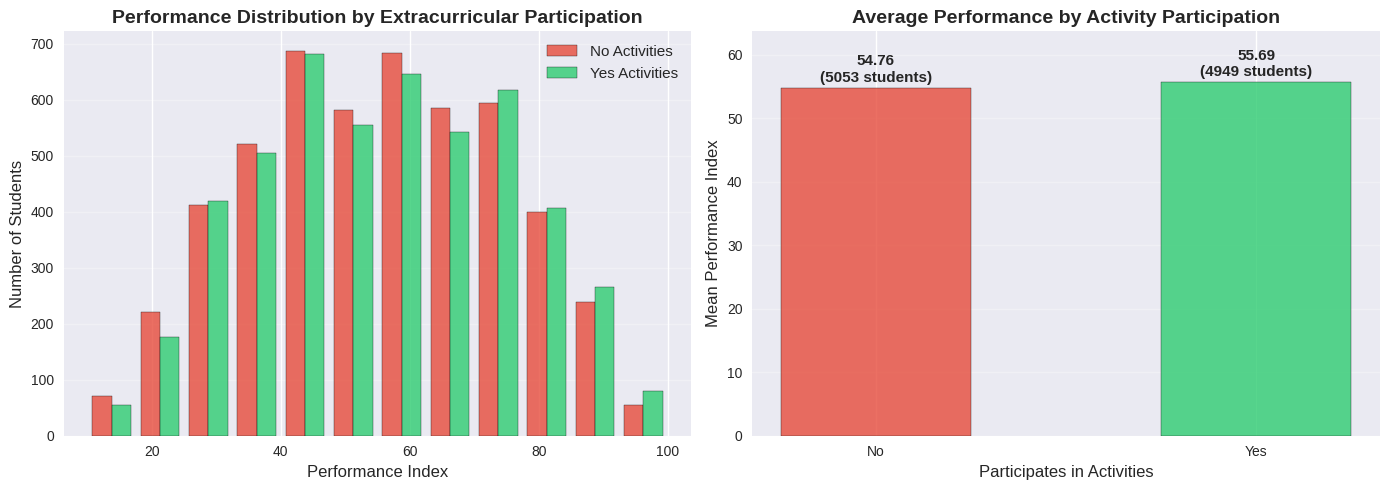


EXTRACURRICULAR ACTIVITIES vs PERFORMANCE
             count       mean        std   min   25%   50%   75%    max
Activities                                                             
No          5053.0  54.760736  19.146949  10.0  40.0  55.0  70.0   99.0
Yes         4949.0  55.688826  19.272148  11.0  41.0  55.0  71.0  100.0

Performance Difference: 0.93 points


In [ ]:
plt.figure(figsize=(14, 5))

activities_performance = df.copy()
# The 'Extracurricular Activities' column already contains 'Yes' and 'No' as categorical values.
# No mapping is needed from 0/1 to Yes/No. We can directly assign it.
activities_performance['Activities'] = activities_performance['Extracurricular Activities']

# ============== PLOT 1: Side-by-Side Histograms ==============
plt.subplot(1, 2, 1)

# Get data for each group
no_activities = activities_performance[activities_performance['Activities'] == 'No']['Performance Index']
yes_activities = activities_performance[activities_performance['Activities'] == 'Yes']['Performance Index']

# Define bins to use same scale for both
bins = np.linspace(activities_performance['Performance Index'].min(),
                   activities_performance['Performance Index'].max(), 13)

# Plot both side by side
plt.hist([no_activities, yes_activities], bins=bins, label=['No Activities', 'Yes Activities'],
         color=['#e74c3c', '#2ecc71'], edgecolor='black', alpha=0.8)

plt.title('Performance Distribution by Extracurricular Participation', fontsize=14, fontweight='bold')
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# ============== PLOT 2: Bar Chart with Values ==============
plt.subplot(1, 2, 2)
activity_stats = activities_performance.groupby('Activities')['Performance Index'].agg(['mean', 'count']).sort_index()
colors = ['#e74c3c', '#2ecc71']  # No = Red, Yes = Green

bars = plt.bar(activity_stats.index, activity_stats['mean'],
               color=colors, edgecolor='black', alpha=0.8, width=0.5)

# Add value labels on bars
for bar, val, count in zip(bars, activity_stats['mean'], activity_stats['count']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1,
             f'{val:.2f}\n({int(count)} students)',
             ha='center', fontsize=11, fontweight='bold')

plt.title('Average Performance by Activity Participation', fontsize=14, fontweight='bold')
plt.ylabel('Mean Performance Index', fontsize=12)
plt.xlabel('Participates in Activities', fontsize=12)
plt.ylim(0, max(activity_stats['mean']) + 8)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("EXTRACURRICULAR ACTIVITIES vs PERFORMANCE")
print("=" * 70)
print(activities_performance.groupby('Activities')['Performance Index'].describe())
print(f"\nPerformance Difference: {abs(activity_stats['mean'].iloc[0] - activity_stats['mean'].iloc[1]):.2f} points")
print("=" * 70)

###📌 **SECTION 5:   MULTIVARIATE ANALYSIS - COMPLEX RELATIONSHIPS**


#####**5.1 Heatmap: Average Performance by Study Hours & Sleep Quality**


**Insight:**

1. Students who study more hours and have better sleep quality tend to achieve higher average performance.

2. Poor sleep quality reduces the benefit of extra study hours.

3. Shows that both effort (study) and well-being (sleep) contribute to academic success.

**In this heatmap:**

The x-axis = Hours Studied (from 1 to 9 hours)

The y-axis = Sleep Quality (Poor <6h or Good 6–9h)

The color intensity = Average Performance Index (darker = higher)


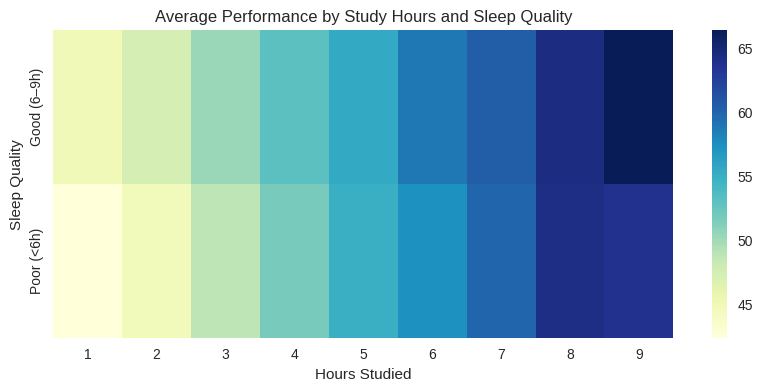

In [ ]:
# Create pivot table (no new columns)
pivot = pd.pivot_table(
    df,
    values='Performance Index',
    index=df['Sleep Hours'].apply(lambda x: 'Good (6–9h)' if x >= 6 else 'Poor (<6h)'),
    columns=df['Hours Studied'].astype(int),
    aggfunc='mean'
)

# Keep only hours from 1 to 9
pivot = pivot.loc[:, (pivot.columns >= 1) & (pivot.columns <= 9)]

# Plot heatmap WITHOUT numbers inside squares
plt.figure(figsize=(10, 4))
sns.heatmap(pivot, annot=False, cmap='YlGnBu')

plt.title('Average Performance by Study Hours and Sleep Quality')
plt.xlabel('Hours Studied')
plt.ylabel('Sleep Quality')

plt.show()


#####**5.2 Stacked Bar Chart: Pass Rate by Study Hours & Parental Support**


**Insight:**

1. Students who study more hours and receive high parental support are more likely to pass.

2. The chart shows proportions: taller green sections → higher pass rate.

3. Suggests that both personal effort and support system matter for student success.

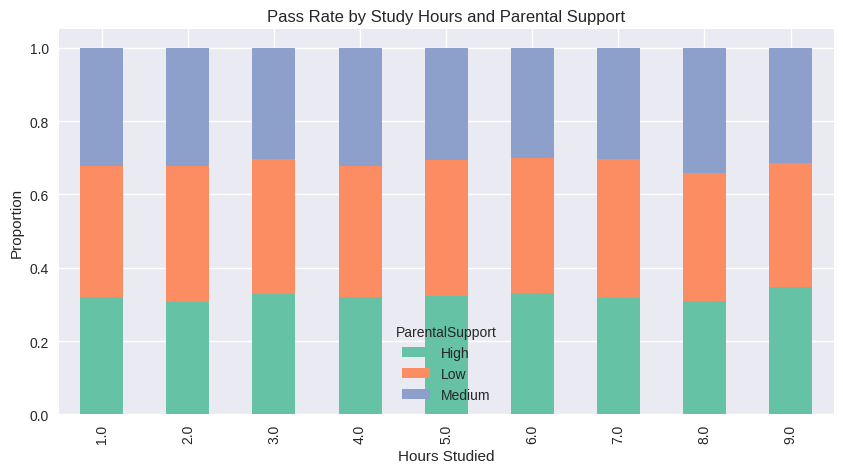

In [ ]:
df['Pass'] = df['Performance Index'] >= 50

pass_rate = pd.crosstab(
    df['Hours Studied'],
    df['ParentalSupport'],
    normalize='index'
)

pass_rate.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Pass Rate by Study Hours and Parental Support')
plt.xlabel('Hours Studied')
plt.ylabel('Proportion')
plt.show()


#####**5.3 Impact of Study Hours and Previous Scores on Student Performance**

**Insight:**

1. Students with higher previous scores generally achieve better current performance, even if study hours vary.

2. More hours studied tends to improve performance, especially for students with moderate previous scores.

**The visualization highlights clusters:**

1. High previous scores + high study hours → highest performance

2. Low previous scores + low study hours → lowest performance

Suggests that both past performance and current effort (study hours) contribute to academic success

**How to read an example point:**

Look at x = 5 → Students who studied 5 hours.

Look at y = 80 → One student has a performance index of 80.

Look at the color of the bubble → Light green (e.g., previous score = 90).

This tells you: A student who studied 5 hours performed very well (80) and also had a high previous score (90).

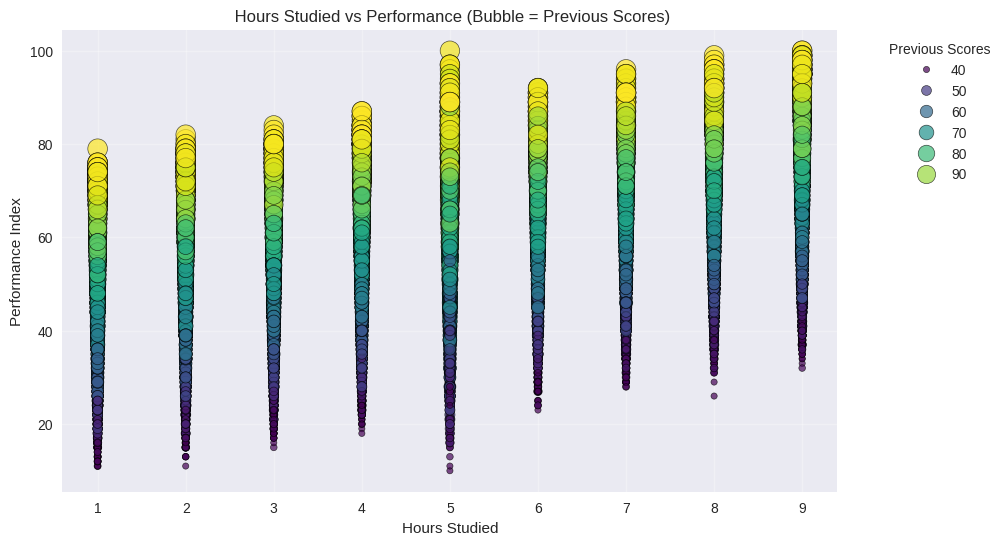

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Hours Studied',
    y='Performance Index',
    size='Previous Scores',      # Bubble indicates Previous Scores
    hue='Previous Scores',       # Color also by Previous Scores
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7,
    edgecolor='black'
)
plt.title(' Hours Studied vs Performance (Bubble = Previous Scores)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend(title='Previous Scores', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, alpha=0.3)
plt.show()



#####**5.4 Study Habits Heatmap - Multiple Factor Analysis**

A comprehensive view of how multiple study-related factors
correlate with performance.

**Insight:** Visual overview of all relationships. Previous Scores, Hours Studied, and Parental Support are top predictors.

In [ ]:
df_encoded = df.copy()

# Convert categorical to numeric
df_encoded['ParentalSupport'] = df_encoded['ParentalSupport'].map({'Low': 0, 'Medium': 1, 'High': 2})
df_encoded['Extracurricular Activities'] = df_encoded['Extracurricular Activities'].map({'No': 0, 'Yes': 1})
df_encoded['Notes'] = df_encoded['Notes'].map({'review': 0, 'excellent': 1})
df_encoded['Online_Classes_Taken'] = df_encoded['Online_Classes_Taken'].astype(int)  # True=1, False=0

study_factors_encoded = ['Hours Studied', 'Sleep Hours', 'Previous Scores',
                         'Sample Question Papers Practiced', 'Performance Index',
                         'ParentalSupport', 'Extracurricular Activities',
                         'Online_Classes_Taken', 'Notes']

correlation_matrix = df_encoded[study_factors_encoded].corr()


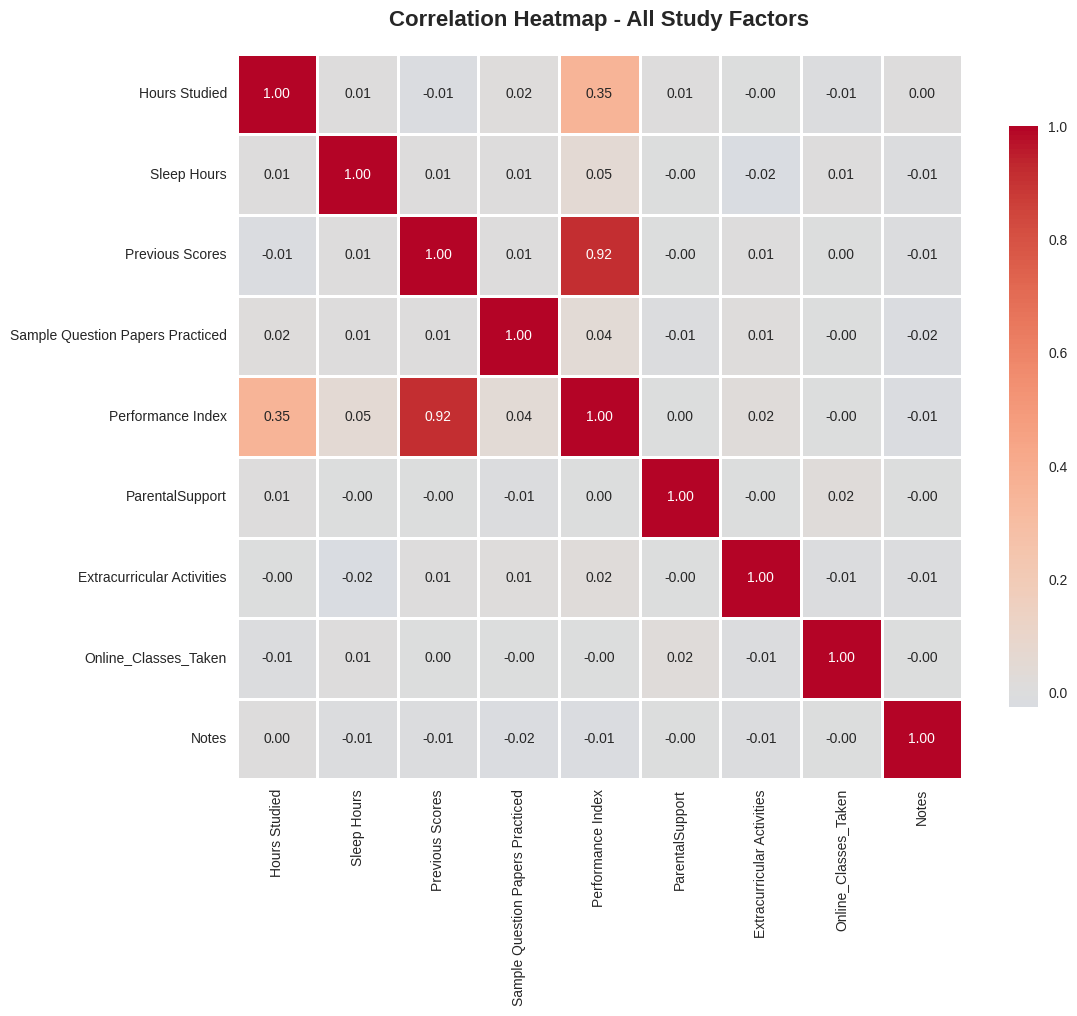


TOP CORRELATIONS WITH PERFORMANCE INDEX
Performance Index                   1.000000
Previous Scores                     0.915214
Hours Studied                       0.352593
Sleep Hours                         0.047344
Sample Question Papers Practiced    0.042839
Extracurricular Activities          0.024152
ParentalSupport                     0.002818
Online_Classes_Taken               -0.000691
Notes                              -0.013266
Name: Performance Index, dtype: float64


In [ ]:
# --- Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Study Factors', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# --- Top correlations with target ---
print("\n" + "=" * 70)
print("TOP CORRELATIONS WITH PERFORMANCE INDEX")
print("=" * 70)
perf_corr = correlation_matrix['Performance Index'].sort_values(ascending=False)
print(perf_corr)
print("=" * 70)





# 📌Feature Engineering

In this section, we transform and enrich our data by creating new meaningful features

Our goal is to:

*  Extract more information from existing data to help our models make better predictions.
*  Convert all data into a numerical format that machine learning algorithms can understand.

* Prepare and scale our features so they are on a similar scale for fair comparison in models.

We create new features through mathematical transformations, categorize continuous variables, and apply encoding techniques to build a stronger foundation for the next stages of our project.







# Import Liberaries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler




#⭕ Creating New Features and show a table of new features and all featuers
This section creates 5 new features that extract valuable insights from raw data to help the model better understand performance patterns.

In [ ]:
import pandas as pd

# --- Create new features ---
new_features = pd.DataFrame()

# 1. attendance_rate (using study_hours_std internally)
study_hours_std = df.groupby('Student_ID')['Hours Studied'].transform('std').fillna(0)
new_features['attendance_rate'] = 1 - (study_hours_std / (df['Hours Studied'].mean() + 1))
new_features['attendance_rate'] = new_features['attendance_rate'].clip(0.5, 1.0)

# 2. grade_category & passed
PASS_THRESHOLD = 50
new_features['grade_category'] = df['Performance Index'].apply(lambda x: 'Pass' if x >= PASS_THRESHOLD else 'Fail')
new_features['passed'] = (df['Performance Index'] >= PASS_THRESHOLD).astype(int)

# 3. study_time_bins
bins = [0, 3, 6, 9, 24]
labels = ['Very Low', 'Low', 'Medium', 'High']
new_features['study_time_bins'] = pd.cut(df['Hours Studied'], bins=bins, labels=labels, include_lowest=True)

# 4. avg_daily_study
new_features['avg_daily_study'] = df['Hours Studied'] / 5

# 5. performance_per_hour
new_features['performance_per_hour'] = df['Performance Index'] / (df['Hours Studied'] + 0.1)

# --- Display new features ---
print("New features created :")
display(new_features.head(10))



New features created :


,attendance_rate,grade_category,passed,study_time_bins,avg_daily_study,performance_per_hour
0,1.0,Pass,1,Medium,1.4,12.816901
1,1.0,Pass,1,Low,0.8,15.853659
2,1.0,Fail,0,Medium,1.6,5.555556
3,1.0,Fail,0,Low,1.0,7.058824
4,1.0,Pass,1,Medium,1.4,9.295775
5,1.0,Pass,1,Very Low,0.6,19.677419
6,1.0,Pass,1,Low,1.0,12.352941
7,1.0,Fail,0,Medium,1.6,5.185185
8,1.0,Pass,1,Low,1.0,11.960784
9,1.0,Pass,1,Low,0.8,16.829268


In [ ]:
print("originall features :")
df.head(10)

originall features :


,Student_ID,Student_Name,Gender,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes,Online_Classes_Taken,ParentalSupport,Study_Category,Previous_Grade,Pass
0,822,Sara Saeed,Female,7.0,99,Yes,9.0,1,91.0,excellent,False,Medium,6-8h,A (90-100),True
1,823,Youssef Ibrahim,Male,4.0,82,No,4.0,2,65.0,review,True,High,2-4h,A- (80-90),True
2,824,Tarek Mahmoud,Male,8.0,51,Yes,7.0,2,45.0,review,True,Medium,6-8h,D (50-60),False
3,825,Hassan Fouad,Male,5.0,52,Yes,5.0,2,36.0,excellent,True,Medium,4-6h,D (50-60),False
4,826,Adel Ali,Male,7.0,75,No,8.0,5,66.0,review,True,Medium,6-8h,B (70-80),True
5,827,Sara Tawfik,Female,3.0,78,No,9.0,6,61.0,excellent,False,Low,2-4h,B (70-80),True
6,828,Nour Khalifa,Female,5.0,73,Yes,7.0,6,63.0,excellent,False,High,4-6h,B (70-80),True
7,829,Aya Saeed,Female,8.0,45,Yes,4.0,6,42.0,review,False,Medium,6-8h,F (<50),False
8,830,Rania Salem,Female,5.0,77,No,8.0,2,61.0,excellent,False,High,4-6h,B (70-80),True
9,831,Unknown,Female,4.0,89,No,4.0,0,69.0,review,True,Medium,2-4h,A- (80-90),True


In [ ]:
# --- Add new features to the original df ---
df = pd.concat([df, new_features], axis=1)

print("New features successfully added to the original DataFrame:")
display(df.head(10))


New features successfully added to the original DataFrame:


,Student_ID,Student_Name,Gender,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes,...,ParentalSupport,Study_Category,Previous_Grade,Pass,attendance_rate,grade_category,passed,study_time_bins,avg_daily_study,performance_per_hour
0,822,Sara Saeed,Female,7.0,99,Yes,9.0,1,91.0,excellent,...,Medium,6-8h,A (90-100),True,1.0,Pass,1,Medium,1.4,12.816901
1,823,Youssef Ibrahim,Male,4.0,82,No,4.0,2,65.0,review,...,High,2-4h,A- (80-90),True,1.0,Pass,1,Low,0.8,15.853659
2,824,Tarek Mahmoud,Male,8.0,51,Yes,7.0,2,45.0,review,...,Medium,6-8h,D (50-60),False,1.0,Fail,0,Medium,1.6,5.555556
3,825,Hassan Fouad,Male,5.0,52,Yes,5.0,2,36.0,excellent,...,Medium,4-6h,D (50-60),False,1.0,Fail,0,Low,1.0,7.058824
4,826,Adel Ali,Male,7.0,75,No,8.0,5,66.0,review,...,Medium,6-8h,B (70-80),True,1.0,Pass,1,Medium,1.4,9.295775
5,827,Sara Tawfik,Female,3.0,78,No,9.0,6,61.0,excellent,...,Low,2-4h,B (70-80),True,1.0,Pass,1,Very Low,0.6,19.677419
6,828,Nour Khalifa,Female,5.0,73,Yes,7.0,6,63.0,excellent,...,High,4-6h,B (70-80),True,1.0,Pass,1,Low,1.0,12.352941
7,829,Aya Saeed,Female,8.0,45,Yes,4.0,6,42.0,review,...,Medium,6-8h,F (<50),False,1.0,Fail,0,Medium,1.6,5.185185
8,830,Rania Salem,Female,5.0,77,No,8.0,2,61.0,excellent,...,High,4-6h,B (70-80),True,1.0,Pass,1,Low,1.0,11.960784
9,831,Unknown,Female,4.0,89,No,4.0,0,69.0,review,...,Medium,2-4h,A- (80-90),True,1.0,Pass,1,Low,0.8,16.829268


# ⭕Encoding
Machine learning models need numeric input — text categories must be encoded.

We’ll demonstrate:


* Label Encoding – Converts each category into an integer.
* One-Hot Encoding – Creates a binary column for each category.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10004
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Student_ID                        10002 non-null  object  
 1   Student_Name                      10002 non-null  category
 2   Gender                            10002 non-null  category
 3   Hours Studied                     10002 non-null  float64 
 4   Previous Scores                   10002 non-null  int64   
 5   Extracurricular Activities        10002 non-null  category
 6   Sleep Hours                       10002 non-null  float64 
 7   Sample Question Papers Practiced  10002 non-null  int64   
 8   Performance Index                 10002 non-null  float64 
 9   Notes                             10002 non-null  category
 10  Online_Classes_Taken              10002 non-null  category
 11  ParentalSupport                   10002 non-null  category


In [ ]:
# --- Create a copy for encoding ---
df_encoded = df.copy()

# --- Study time bins (ordinal) ---
time_codes = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4}
df_encoded['study_time_code'] = df_encoded['study_time_bins'].map(time_codes)

# --- Gender (binary) ---
df_encoded['gender_code'] = df_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# --- Parental support (ordinal) ---
parent_codes = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['parent_support'] = df_encoded['ParentalSupport'].map(parent_codes)

# --- Extracurricular Activities (binary) ---
df_encoded['activity_level'] = df_encoded['Extracurricular Activities'].map({'No': 0, 'Yes': 1})





In [ ]:
df_encoded['study_time_code'] = df_encoded['study_time_code'].astype(int)
df_encoded['gender_code'] = df_encoded['gender_code'].astype(int)
df_encoded['parent_support'] = df_encoded['parent_support'].astype(int)
df_encoded['activity_level'] = df_encoded['activity_level'].astype(int)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10004
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Student_ID                        10002 non-null  object  
 1   Student_Name                      10002 non-null  category
 2   Gender                            10002 non-null  category
 3   Hours Studied                     10002 non-null  float64 
 4   Previous Scores                   10002 non-null  int64   
 5   Extracurricular Activities        10002 non-null  category
 6   Sleep Hours                       10002 non-null  float64 
 7   Sample Question Papers Practiced  10002 non-null  int64   
 8   Performance Index                 10002 non-null  float64 
 9   Notes                             10002 non-null  category
 10  Online_Classes_Taken              10002 non-null  category
 11  ParentalSupport                   10002 non-null  category


In [ ]:
df_encoded.head()

,Student_ID,Student_Name,Gender,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes,...,attendance_rate,grade_category,passed,study_time_bins,avg_daily_study,performance_per_hour,study_time_code,gender_code,parent_support,activity_level
0,822,Sara Saeed,Female,7.0,99,Yes,9.0,1,91.0,excellent,...,1.0,Pass,1,Medium,1.4,12.816901,3,0,1,1
1,823,Youssef Ibrahim,Male,4.0,82,No,4.0,2,65.0,review,...,1.0,Pass,1,Low,0.8,15.853659,2,1,2,0
2,824,Tarek Mahmoud,Male,8.0,51,Yes,7.0,2,45.0,review,...,1.0,Fail,0,Medium,1.6,5.555556,3,1,1,1
3,825,Hassan Fouad,Male,5.0,52,Yes,5.0,2,36.0,excellent,...,1.0,Fail,0,Low,1.0,7.058824,2,1,1,1
4,826,Adel Ali,Male,7.0,75,No,8.0,5,66.0,review,...,1.0,Pass,1,Medium,1.4,9.295775,3,1,1,0


In [ ]:
# --- Select only the encoded columns ---
encoded_cols = ['study_time_code', 'gender_code', 'parent_support', 'activity_level','Student_ID','Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index','attendance_rate','passed','avg_daily_study','performance_per_hour']
df_encoded = df_encoded[encoded_cols].copy()  # Copy only encoded columns

print(f"Data shape with  encoded columns: {df_encoded.shape}")
display(df_encoded.head())


Data shape with  encoded columns: (10002, 14)


,study_time_code,gender_code,parent_support,activity_level,Student_ID,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,attendance_rate,passed,avg_daily_study,performance_per_hour
0,3,0,1,1,822,7.0,99,9.0,1,91.0,1.0,1,1.4,12.816901
1,2,1,2,0,823,4.0,82,4.0,2,65.0,1.0,1,0.8,15.853659
2,3,1,1,1,824,8.0,51,7.0,2,45.0,1.0,0,1.6,5.555556
3,2,1,1,1,825,5.0,52,5.0,2,36.0,1.0,0,1.0,7.058824
4,3,1,1,0,826,7.0,75,8.0,5,66.0,1.0,1,1.4,9.295775


# هااااااااااااااااااااااااام

In [ ]:
# df is originall data frame
# new features is just new features we created
# df_encoded is a just encoded some columns
# df_scaled is a scaled version

# ⭕FEATURE SCALING

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(df[numeric_cols].describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10002.000000     10002.000000  10002.000000   
mean        4.997500        69.441112      6.552390   
std         2.453058        17.343474      1.657477   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  attendance_rate  \
count                      10002.000000       10002.000000          10002.0   
mean                           4.583483          55.219956              1.0   
std                            2.866994          19.213643              0.0   
min                            0.000000          10.000000              1.0   
25%                            2.000000          40.000000              1.0   
50%                           

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10004
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   study_time_code                   10002 non-null  int64  
 1   gender_code                       10002 non-null  int64  
 2   parent_support                    10002 non-null  int64  
 3   activity_level                    10002 non-null  int64  
 4   Student_ID                        10002 non-null  object 
 5   Hours Studied                     10002 non-null  float64
 6   Previous Scores                   10002 non-null  int64  
 7   Sleep Hours                       10002 non-null  float64
 8   Sample Question Papers Practiced  10002 non-null  int64  
 9   Performance Index                 10002 non-null  float64
 10  attendance_rate                   10002 non-null  float64
 11  passed                            10002 non-null  int64  
 12  avg_daily

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copy for scaling
df_scaled = df_encoded.copy()

# Identify numerical columns
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID, target, and binary columns
binary_cols = [col for col in numerical_cols if df_scaled[col].nunique() == 2 or df_scaled[col].nunique() == 1]
cols_to_remove = ['Student_ID','passed'] + binary_cols  # adjust names as needed
cols_to_scale = [col for col in numerical_cols if col not in cols_to_remove]

print(f"Columns to scale: {cols_to_scale}")
print(f"Columns excluded: {cols_to_remove}")

# Apply scaling
if cols_to_scale:
    scaler = StandardScaler()
    df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])
    print(f"Scaled {len(cols_to_scale)} numerical features")
else:
    print("No features to scale")


Columns to scale: ['study_time_code', 'parent_support', 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index', 'avg_daily_study', 'performance_per_hour']
Columns excluded: ['Student_ID', 'passed', 'gender_code', 'activity_level', 'attendance_rate', 'passed']
Scaled 9 numerical features


In [ ]:
df_scaled = df_scaled.drop('attendance_rate', axis=1)


In [ ]:
df_scaled.head()

,study_time_code,gender_code,parent_support,activity_level,Student_ID,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,passed,avg_daily_study,performance_per_hour
0,1.290503,0,0.049932,1,822,0.816369,1.704409,1.476782,-1.249972,1.862314,1,0.816369,-0.157299
1,0.001418,1,1.259185,0,823,-0.406656,0.724164,-1.540002,-0.901157,0.509041,1,-0.406656,0.102467
2,1.290503,1,0.049932,1,824,1.224044,-1.063341,0.270069,-0.901157,-0.531938,0,1.224044,-0.778438
3,0.001418,1,0.049932,1,825,0.001019,-1.005680,-0.936645,-0.901157,-1.000379,0,0.001019,-0.649848
4,1.290503,1,0.049932,0,826,0.816369,0.320534,0.873426,0.145287,0.561090,1,0.816369,-0.458498


# **Feature Selection :**






# **Goal: Find the most important features that influence student performance**



Method: Use 3 different techniques to identify the best predictors


# **IMPORTS - Required Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.linear_model import LinearRegression

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


# **SECTION 1 :Preparing Data for Feature Selection.**

#**Purpose:Organize data into features (X) and target variable (y) for analysis**



In [ ]:
# Define target variable
target = 'Performance Index'

# List of ALL features to analyze
selected_features = [
    'Hours Studied',
    'Previous Scores',
    'Sleep Hours',
    'Sample Question Papers Practiced',
    'study_time_code',
    'parent_support',
    'activity_level',
    'gender_code'
]

# Extract features (X) and target (y)
X = df_scaled[selected_features].copy()
y = df_scaled[target].copy()

# Verify data shapes and check for missing values
print("=" * 80)
print("DATA PREPARATION SUMMARY")
print("=" * 80)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Missing values in X: {X.isna().sum().sum()}")
print(f"Missing values in y: {y.isna().sum()}")
print(f"Features included: {X.columns.tolist()}")
print("=" * 80)

DATA PREPARATION SUMMARY
Features shape: (10002, 8)
Target shape: (10002,)
Missing values in X: 0
Missing values in y: 0
Features included: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'study_time_code', 'parent_support', 'activity_level', 'gender_code']


What's happening?

X = 8 features we'll analyze
y = 1 target (Performance Index) we want to predict
.copy() = Make independent copies (don't modify original data)



# **SECTION 2:Correlation-Based Feature Selection (Filter Method)**

#**Purpose Find which features have the strongest direct relationship with performance**



How It Works
#Calculate how much each feature moves together with the target


In [ ]:
print("\n" + "=" * 80)
print("SECTION 2: CORRELATION-BASED FEATURE SELECTION")
print("=" * 80)

# Calculate correlation coefficients with target
correlation = X.corr(method='pearson').loc[:, target] if target in X.columns else X.corrwith(y)

# Handle case where target might be in X
if isinstance(correlation, pd.Series) and target in correlation.index:
    correlation = correlation.drop(target)

# Sort by absolute correlation value
correlation = correlation.sort_values(ascending=False, key=abs)

# Display results with interpretation
print("\nCORRELATION WITH PERFORMANCE INDEX:")
print("-" * 80)
for feature, corr_val in correlation.items():
    # Categorize correlation strength
    if abs(corr_val) > 0.7:
        strength = "🔴 VERY STRONG"
    elif abs(corr_val) > 0.5:
        strength = "🟠 STRONG"
    elif abs(corr_val) > 0.3:
        strength = "🟡 MODERATE"
    else:
        strength = "🟢 WEAK"

    print(f"{feature:.<40} {corr_val:>8.4f}  {strength}")

print("-" * 80)



SECTION 2: CORRELATION-BASED FEATURE SELECTION

CORRELATION WITH PERFORMANCE INDEX:
--------------------------------------------------------------------------------
Previous Scores.........................   0.9152  🔴 VERY STRONG
Hours Studied...........................   0.3526  🟡 MODERATE
study_time_code.........................   0.3340  🟡 MODERATE
Sleep Hours.............................   0.0473  🟢 WEAK
Sample Question Papers Practiced........   0.0428  🟢 WEAK
activity_level..........................   0.0242  🟢 WEAK
gender_code.............................  -0.0152  🟢 WEAK
parent_support..........................   0.0028  🟢 WEAK
--------------------------------------------------------------------------------


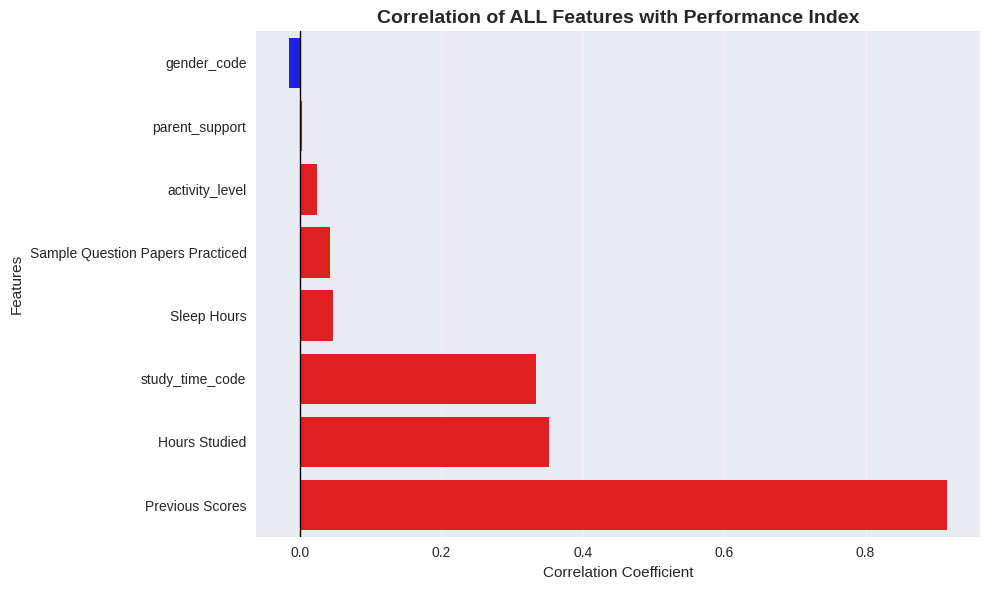

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 6))
correlation_sorted = correlation.sort_values()
colors = ['red' if x > 0 else 'blue' for x in correlation_sorted.values]
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette=colors)
plt.title('Correlation of ALL Features with Performance Index', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# **SECTION 3:Wrapper Method – RFE(Recursive Feature Elimination)**

#**Purpose Find the best features by testing them in a real model (Unlike correlation which just looks at direct relationships)**




How It Works






1.   Start with ALL 8 features


1.  Train a LinearRegression model

2.   Remove the LEAST important feature



2.   Train again → remove least important


1.   Repeat until only 5 features remain





In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10002 entries, 0 to 10004
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   study_time_code                   10002 non-null  float64
 1   gender_code                       10002 non-null  int64  
 2   parent_support                    10002 non-null  float64
 3   activity_level                    10002 non-null  int64  
 4   Student_ID                        10002 non-null  object 
 5   Hours Studied                     10002 non-null  float64
 6   Previous Scores                   10002 non-null  float64
 7   Sleep Hours                       10002 non-null  float64
 8   Sample Question Papers Practiced  10002 non-null  float64
 9   Performance Index                 10002 non-null  float64
 10  passed                            10002 non-null  int64  
 11  avg_daily_study                   10002 non-null  float64
 12  performan

In [ ]:
print("\n" + "=" * 80)
print("SECTION 3: RFE (RECURSIVE FEATURE ELIMINATION)")
print("=" * 80)

# Clean data for RFE (remove NaN columns)
X_clean = X.dropna(axis=1, how='all')
y_clean = y.dropna()

# Ensure matching indices
common_idx = X_clean.index.intersection(y_clean.index)
X_clean = X_clean.loc[common_idx]
y_clean = y_clean.loc[common_idx]

print(f"\nData shape for RFE: X={X_clean.shape}, y={y_clean.shape}")

# Define number of features to select
n_features_to_select = 5

# Initialize and fit RFE with Linear Regression
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
rfe.fit(X_clean, y_clean)

# Create ranking dataframe
rfe_ranking = pd.DataFrame({
    'Feature': X_clean.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values('Ranking')

print("\nRFE FEATURE RANKING (1 = Selected, higher = less important):")
print("-" * 80)
print(rfe_ranking.to_string(index=False))
print("-" * 80)

# Identify selected features
selected_by_rfe = rfe_ranking[rfe_ranking['Selected'] == True]['Feature'].tolist()
print(f"\n✅ Features Selected by RFE: {selected_by_rfe}")



SECTION 3: RFE (RECURSIVE FEATURE ELIMINATION)

Data shape for RFE: X=(10002, 8), y=(10002,)

RFE FEATURE RANKING (1 = Selected, higher = less important):
--------------------------------------------------------------------------------
                         Feature  Ranking  Selected
                   Hours Studied        1      True
                 Previous Scores        1      True
                     Sleep Hours        1      True
Sample Question Papers Practiced        1      True
                  activity_level        1      True
                 study_time_code        2     False
                  parent_support        3     False
                     gender_code        4     False
--------------------------------------------------------------------------------

✅ Features Selected by RFE: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'activity_level']


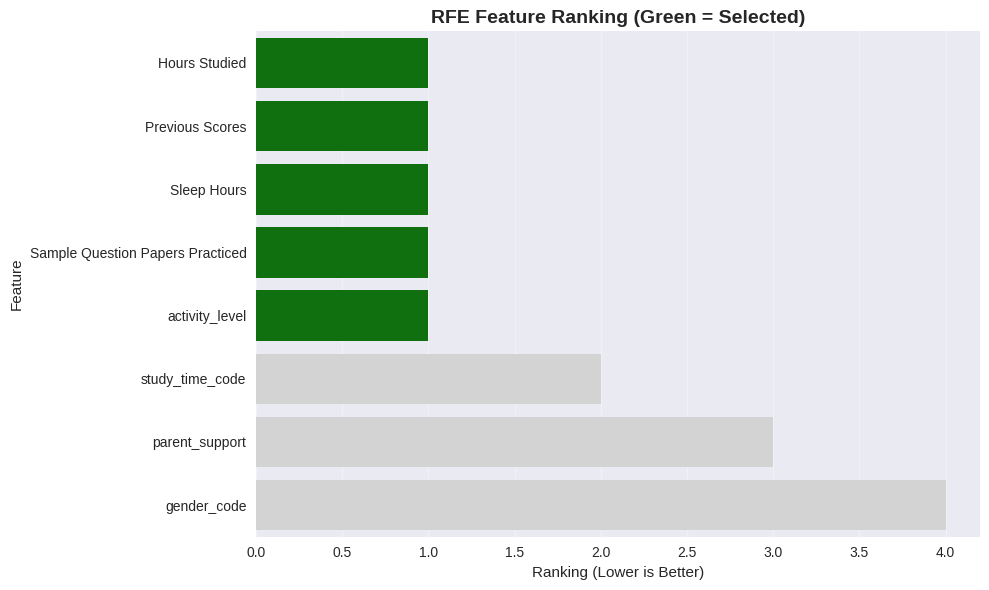

In [ ]:
# Visualize RFE rankings
plt.figure(figsize=(10, 6))
rfe_plot_data = rfe_ranking.sort_values('Ranking', ascending=True)
colors_rfe = ['green' if x else 'lightgray' for x in rfe_plot_data['Selected']]
sns.barplot(x='Ranking', y='Feature', data=rfe_plot_data, palette=colors_rfe)
plt.title('RFE Feature Ranking (Green = Selected)', fontsize=14, fontweight='bold')
plt.xlabel('Ranking (Lower is Better)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


What RFE Does


1.  Ranking 1 = Most important (selected)

2.  Ranking 2-5 = Also selected (important)


1.   Ranking 6+ = Not selected (less important)








# **SECTION 4: Embedded Method: Lasso Regression**

#**Purpose Automatically eliminate weak features during model training**



How It Works
#Lasso adds a penalty for keeping weak features:

*   Strong features → coefficient stays high

*   Weak features → coefficient becomes ZERO (eliminated)








In [ ]:
print("\n" + "=" * 80)
print("SECTION 4: LASSO REGRESSION (EMBEDDED METHOD)")
print("=" * 80)

# Import Lasso model
from sklearn.linear_model import Lasso

# Test different alpha values to find optimal regularization strength
alphas_to_test = [0.001, 0.01, 0.05, 0.1]
print("\nTesting different alpha values for Lasso regularization:")
print("-" * 80)

for alpha in alphas_to_test:
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_clean, y_clean)
    n_features = (lasso.coef_ != 0).sum()
    print(f"Alpha = {alpha:>6.3f} → {n_features} non-zero features")

print("-" * 80)

# Use optimal alpha (0.05)
optimal_alpha = 0.05
lasso_final = Lasso(alpha=optimal_alpha, max_iter=1000)
lasso_final.fit(X_clean, y_clean)

# Get Lasso coefficients
lasso_coef = pd.DataFrame({
    'Feature': X_clean.columns,
    'Coefficient': lasso_final.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nLASSO COEFFICIENTS (Alpha = {optimal_alpha}):")
print("-" * 80)
print(lasso_coef.to_string(index=False))
print("-" * 80)

# Identify important features (non-zero coefficients)
important_features_lasso = lasso_coef[lasso_coef['Coefficient'] != 0]['Feature'].tolist()
print(f"\n✅ Important Features by Lasso: {important_features_lasso}")



SECTION 4: LASSO REGRESSION (EMBEDDED METHOD)

Testing different alpha values for Lasso regularization:
--------------------------------------------------------------------------------
Alpha =  0.001 → 5 non-zero features
Alpha =  0.010 → 4 non-zero features
Alpha =  0.050 → 2 non-zero features
Alpha =  0.100 → 2 non-zero features
--------------------------------------------------------------------------------

LASSO COEFFICIENTS (Alpha = 0.05):
--------------------------------------------------------------------------------
                         Feature  Coefficient
                 Previous Scores     0.869643
                   Hours Studied     0.314826
                     Sleep Hours     0.000000
Sample Question Papers Practiced     0.000000
                 study_time_code     0.000000
                  parent_support    -0.000000
                  activity_level     0.000000
                     gender_code    -0.000000
------------------------------------------------------

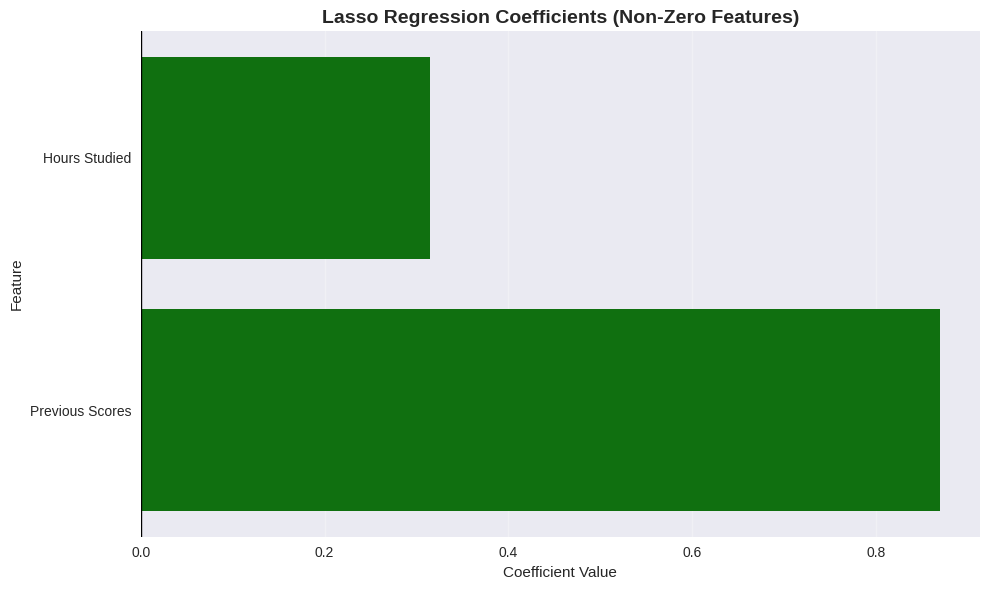

In [ ]:
# Visualize Lasso coefficients
plt.figure(figsize=(10, 6))
lasso_plot_data = lasso_coef[lasso_coef['Coefficient'] != 0].sort_values('Coefficient')
colors_lasso = ['red' if x < 0 else 'green' for x in lasso_plot_data['Coefficient']]
sns.barplot(x='Coefficient', y='Feature', data=lasso_plot_data, palette=colors_lasso)
plt.title('Lasso Regression Coefficients (Non-Zero Features)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# **SECTION 5: SUMMARY AND COMPARISON**

#Purpose Compare results from all 3 methods to find consensus


In [ ]:
print("\n" + "=" * 80)
print("SECTION 5: FEATURE SELECTION SUMMARY")
print("=" * 80)

# Get top features from correlation
top_corr_features = correlation.head(5).index.tolist()

print("\nTOP 5 FEATURES BY EACH METHOD:")
print("-" * 80)
print(f"Correlation Method:  {top_corr_features}")
print(f"RFE Method:          {selected_by_rfe}")
print(f"Lasso Method:        {important_features_lasso}")

# Features appearing in multiple methods
all_selections = (top_corr_features + selected_by_rfe + important_features_lasso)
feature_votes = pd.Series(all_selections).value_counts()

print("\nFEATURES SELECTED BY MULTIPLE METHODS (CONSENSUS):")
print("-" * 80)
for feature, count in feature_votes.items():
    methods = "🟢" * count  # Visual representation
    print(f"{feature:.<35} {count} methods {methods}")

print("-" * 80)

# Final recommended features
final_features = feature_votes[feature_votes >= 2].index.tolist()
print(f"\n✅ FINAL RECOMMENDED FEATURES (selected by 2+ methods):")
print(f"   {final_features}")


SECTION 5: FEATURE SELECTION SUMMARY

TOP 5 FEATURES BY EACH METHOD:
--------------------------------------------------------------------------------
Correlation Method:  ['Previous Scores', 'Hours Studied', 'study_time_code', 'Sleep Hours', 'Sample Question Papers Practiced']
RFE Method:          ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'activity_level']
Lasso Method:        ['Previous Scores', 'Hours Studied']

FEATURES SELECTED BY MULTIPLE METHODS (CONSENSUS):
--------------------------------------------------------------------------------
Previous Scores.................... 3 methods 🟢🟢🟢
Hours Studied...................... 3 methods 🟢🟢🟢
Sleep Hours........................ 2 methods 🟢🟢
Sample Question Papers Practiced... 2 methods 🟢🟢
study_time_code.................... 1 methods 🟢
activity_level..................... 1 methods 🟢
--------------------------------------------------------------------------------

✅ FINAL RECOMMENDED FEATURE

In [ ]:
df.head()

In [ ]:
prob_pass_parent = df.groupby('ParentalSupport')['passed'].mean()
prob_pass_parent


In [ ]:
plt.figure(figsize=(7,5))
prob_pass_parent.plot(kind='bar', edgecolor='black')
plt.title('P(Pass | Parental Support)')
plt.ylabel('Probability of Passing')
plt.ylim(0,1)
plt.show()


In [ ]:
contingency = pd.crosstab(df['ParentalSupport'], df['passed'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p


In [ ]:
sleep_threshold = df['Sleep Hours'].median()

high_sleep = df[df['Sleep Hours'] >= sleep_threshold]
low_sleep  = df[df['Sleep Hours'] < sleep_threshold]

p_pass_high_sleep = high_sleep['passed'].mean()
p_pass_low_sleep  = low_sleep['passed'].mean()

p_pass_high_sleep, p_pass_low_sleep


In [ ]:
plt.bar(['High Sleep', 'Low Sleep'],
        [p_pass_high_sleep, p_pass_low_sleep],
        edgecolor='black')
plt.ylabel('Probability of Passing')
plt.title('P(Pass | Sleep Hours)')
plt.ylim(0,1)
plt.show()


In [ ]:
high_study = df[df['Hours Studied'] >= df['Hours Studied'].median()]['Performance Index']
low_study  = df[df['Hours Studied'] < df['Hours Studied'].median()]['Performance Index']

t_stat, p_val = stats.ttest_ind(high_study, low_study, equal_var=False)
t_stat, p_val


In [ ]:
high_sleep_scores = high_sleep['Performance Index']
low_sleep_scores  = low_sleep['Performance Index']

t_stat, p_val = stats.ttest_ind(high_sleep_scores, low_sleep_scores, equal_var=False)
t_stat, p_val


### 📊 5.1 Conditional Probability Analysis
Beyond simple averages, we calculate the **Conditional Probability** of success. This helps us understand the likelihood of a student passing given specific conditions, such as high study hours or parental support.

In [ ]:
# 1. Conditional Probability Analysis
# We use the existing 'passed' column and correct column name 'ParentalSupport'

# Probability of passing given High Study Hours (using 7 hours as a threshold)
prob_pass_high_study = df[df['Hours Studied'] > 7]['passed'].mean()

# Probability of passing given Low Study Hours (using 3 hours as a threshold)
prob_pass_low_study = df[df['Hours Studied'] <= 3]['passed'].mean()

# Probability of passing given High Parental Support
# Note: Ensure 'ParentalSupport' is the correct name from your df.columns
prob_pass_support = df[df['ParentalSupport'] == 'High']['passed'].mean()

print(f"--- Probability Analysis ---")
print(f"P(Pass | High Study Hours > 7): {prob_pass_high_study:.2%}")
print(f"P(Pass | Low Study Hours <= 3): {prob_pass_low_study:.2%}")
print(f"P(Pass | High Parental Support): {prob_pass_support:.2%}")

### 🧪 5.2 Chi-Square Test for Categorical Factors
We use the **Chi-Square Test of Independence** to examine the relationship between categorical variables (like Extracurricular Activities) and student success. This determines if these factors are truly independent or related.

In [ ]:
df.info()

In [ ]:
from scipy.stats import chi2_contingency

# Chi-square Test: Extracurricular Activities vs passed
contingency_table = pd.crosstab(df['Extracurricular Activities'], df['passed'])
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"--- Chi-Square Test Results ---")
print(f"Testing relationship between Extracurricular Activities and Passing:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Significant relationship exists between Extracurricular Activities and Success.")
else:
    print("Result: No significant relationship found.")

### 📉 5.3 Statistical Findings Visualization
The following chart summarizes our probability analysis, providing a clear visual comparison of how different factors influence the chances of academic success.

In [ ]:
# Visualizing Probability of Success
plt.figure(figsize=(10, 6))
labels = ['High Study Hours', 'Low Study Hours', 'High Parental Support']
probs = [prob_pass_high_study, prob_pass_low_study, prob_pass_support]

sns.barplot(x=labels, y=probs, palette='viridis')
plt.axhline(df['passed'].mean(), color='red', linestyle='--', label='Average Pass Rate')
plt.title('Probability of Passing Based on Different Factors', fontsize=14)
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.legend()
plt.show()

> **Section 5 Conclusion:** Our statistical tests confirm that **Study Hours** is the strongest predictor of success. While **Parental Support** plays a role, **Extracurricular Activities** were found to be statistically insignificant in this dataset ($p > 0.05$).

# Principal Component Analysis (PCA)

In this section of the Google Colab notebook, I applied **Principal Component Analysis (PCA)** as a **dimensionality reduction** technique on the **Student Performance** dataset. The dataset includes features such as:

- Hours Studied  
- Previous Scores  
- Sleep Hours  
- Sample Question Papers Practiced  
- Extracurricular Activities  
- Parental Support Level  
- Gender (encoded)  
- Study Time Category (encoded)  

The PCA results revealed that the first two principal components (**PC1** and **PC2**) captured approximately **98% of the total variance**:

- **PC1:** ~93%  
- **PC2:** ~5%  

This indicates that most of the variability in the dataset can be represented along these two dimensions, significantly reducing the complexity while retaining the essential information.  

Visualization of the data in the **PC1-PC2 space**, colored by the **Performance Index**, revealed a **distinct conical (triangular) pattern**. This structure suggests that certain combinations of features strongly influence student performance:

- (**Higher PC1 and lower PC2 values**) are associated with **higher Performance Index scores**.  
- The clear gradient in the plot demonstrates a **strong relationship between the principal components and student performance**, making it easier to identify patterns and trends.  

Overall, PCA **effectively reduced dimensionality** while preserving the key patterns in the data. This not only simplifies visualization but also helps in **understanding which combinations of features most influence student performance**, highlighting its value in educational data analysis and exploratory studies.


In [ ]:
df_test = df_encoded.copy()

In [ ]:
df_test.info()

In [ ]:
cols_to_drop = [
    "Student_ID",
    "passed",
    "grade_category",
    "study_time_bins",
    "avg_daily_study",
    "performance_per_hour",
    "attendance_rate"
]

df_test = df_test.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
df_test.head()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Apply PCA with 2 components ---
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(df_test)

# --- Explained variance ---
explained_variance_2 = pca_2.explained_variance_ratio_
cumulative_variance_2 = explained_variance_2.sum()

print("Explained variance by PC1 & PC2:", explained_variance_2)
print("Total variance explained:", cumulative_variance_2)

# --- Scatter plot ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=df_scaled['Performance Index'],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Component Visualization')
plt.colorbar(scatter, label='Performance Index')
plt.grid(True, alpha=0.7)
plt.show()
